In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
df_customer_churn_orig_data = pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')

In [24]:
df_customer_churn = df_customer_churn_orig_data

In [25]:
#Understanding the data
df_customer_churn.shape

(11260, 19)

In [26]:
df_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [27]:
df_customer_churn.describe(include='all')['rev_growth_yoy']

count     11260.0
unique       20.0
top          14.0
freq       1524.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: rev_growth_yoy, dtype: float64

In [28]:
x=df_customer_churn['rev_growth_yoy'].dtype
x

dtype('O')

In [29]:
for obj_col in df_customer_churn.columns:
    if df_customer_churn[obj_col].dtype==object:
        print(df_customer_churn.describe(include='all')[obj_col])
        print('--------------------------------')

count     11158.0
unique       38.0
top           1.0
freq       1351.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Tenure, dtype: float64
--------------------------------
count          11151
unique             5
top       Debit Card
freq            4587
mean             NaN
std              NaN
min              NaN
25%              NaN
50%              NaN
75%              NaN
max              NaN
Name: Payment, dtype: object
--------------------------------
count     11152
unique        4
top        Male
freq       6328
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Gender, dtype: object
--------------------------------
count     11148.0
unique        7.0
top           4.0
freq       4569.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Accoun

In [30]:
df_customer_churn.head(20)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [31]:
df_customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [32]:
#identifying duplicate account IDs
df_customer_churn['AccountID'].value_counts().sort_values(ascending=False)

AccountID
20000    1
20009    1
20010    1
20002    1
20003    1
        ..
31253    1
31254    1
31255    1
31256    1
31259    1
Name: count, Length: 11260, dtype: int64

In [33]:
#Counting values in different columns after removing the numeric column that cannot be categorized. 
for col in df_customer_churn.columns:
    if col not in ['AccountID','Tenure','CC_Contacted_LY','CC_Contacted_LY','rev_per_month','rev_growth_yoy','cashback','Day_Since_CC_connect']:
        print('Column')
        print(pd.concat([df_customer_churn[col].value_counts(),100*df_customer_churn[col].value_counts()/df_customer_churn.shape[0]], axis=1, keys=['value_counts','Percentage']))
        print('------------------------------------')

Column
       value_counts  Percentage
Churn                          
0              9364   83.161634
1              1896   16.838366
------------------------------------
Column
           value_counts  Percentage
City_Tier                          
1.0                7263   64.502664
3.0                3405   30.239787
2.0                 480    4.262877
------------------------------------
Column
                  value_counts  Percentage
Payment                                   
Debit Card                4587   40.737123
Credit Card               3511   31.181172
E wallet                  1217   10.808171
Cash on Delivery          1014    9.005329
UPI                        822    7.300178
------------------------------------
Column
        value_counts  Percentage
Gender                          
Male            6328   56.198934
Female          4178   37.104796
M                376    3.339254
F                270    2.397869
------------------------------------
Column
          

Data fix

In [34]:
#Replacing the values as mentioned in the business report
c=True
while c:
    col=input('Enter the column name: ')
    if col in df_customer_churn.columns:
        wrong_val=input('Enter the value to be replaced: ')
        replace_val = input('Enter the replacement value: ')
        df_customer_churn[col] = df_customer_churn[col].map({wrong_val:replace_val}).fillna(df_customer_churn[col])
        print('The value ',wrong_val, 'has been replaced with ', replace_val)
    else: 
        print('Wrong input, exiting the loop')
        break
    c=input('Would you like to continue with the string replacement operator? (yes/no)').lower()
    c=c=='yes'

Enter the column name: Gender
Enter the value to be replaced: M
Enter the replacement value: Male
The value  M has been replaced with  Male
Would you like to continue with the string replacement operator? (yes/no)yes
Enter the column name: Gender
Enter the value to be replaced: F
Enter the replacement value: Female
The value  F has been replaced with  Female
Would you like to continue with the string replacement operator? (yes/no)yes
Enter the column name: Account_user_count
Enter the value to be replaced: @
Enter the replacement value: 7
The value  @ has been replaced with  7
Would you like to continue with the string replacement operator? (yes/no)yes
Enter the column name: account_segment
Enter the value to be replaced: Regular +
Enter the replacement value: Regular Plus
The value  Regular + has been replaced with  Regular Plus
Would you like to continue with the string replacement operator? (yes/no)yes
Enter the column name: account_segment
Enter the value to be replaced: Super +
En

In [3]:
#df_customer_churn
#df_customer_churn.to_csv('cust_churn_junk_data_fixed.csv')
#df_customer_churn = pd.read_csv('cust_churn_junk_data_fixed.csv')

In [35]:
#exploring the column: Tenure
df_customer_churn['Tenure'].value_counts().sort_values()

Tenure
61       2
50       2
51       2
60       2
31      96
29     114
25     114
32     116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: count, dtype: int64

In [37]:
df_customer_churn.head(20)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [38]:
df_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [39]:
#df_customer_churn.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [40]:
#exploring the column Day_Since_CC_connect. Replace the $ value with 3 as it is the most occuring value
df_customer_churn['Day_Since_CC_connect'].value_counts().sort_values()

Day_Since_CC_connect
46       1
3        1
47       2
31       2
30       2
18      26
16      26
17      34
15      37
14      74
13     117
12     146
11     183
6      229
10     339
5      479
9      622
4      893
7      911
0      964
8     1169
1     1256
2     1574
3     1816
Name: count, dtype: int64

In [41]:
#exploring the column rev_growth_yoy. Replace the $ value with 14 as it is the most occurring value and the number of rows with $ is only 3
df_customer_churn['rev_growth_yoy'].value_counts().sort_values()

rev_growth_yoy
4        3
14       3
28      14
27      35
26      98
25     188
24     229
23     345
22     403
21     433
11     523
20     562
19     619
17     704
18     708
16     949
12    1210
15    1283
13    1427
14    1524
Name: count, dtype: int64

In [42]:
#exploring the column rev_per_month. Replaced the + value with 0 because it has high occurrence(689). The high occurring values are up to 15 and there is a continuous decrease from 5. 0 is the only value that has not been observed.
df_customer_churn['rev_per_month'].value_counts().sort_values()

rev_per_month
103       1
20        1
23        1
122       1
21        1
100       1
25        1
135       1
111       1
109       1
104       1
120       2
19        2
139       2
114       2
131       2
22        2
121       2
105       2
134       2
125       2
113       3
130       3
126       3
116       3
127       3
108       3
119       3
137       3
110       3
138       3
117       3
115       3
101       3
129       4
133       4
118       4
140       4
136       4
107       5
124       5
123       5
102       8
15       24
14       48
13       93
12      166
11      278
1       402
10      413
9       564
8       643
0       689
7       754
6      1085
4      1218
5      1337
2      1585
3      1746
Name: count, dtype: int64

In [43]:
print('Nulls in each column:\n',df_customer_churn.isnull().sum())
print('total nulls in the dataset:',df_customer_churn.isnull().sum().sum())

Nulls in each column:
 AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64
total nulls in the dataset: 2676


In [44]:
#1.2% of data is nulls
df_customer_churn.isnull().sum().sum()/(df_customer_churn.shape[0]*df_customer_churn.shape[1])

0.012508179863513134

In [133]:
#creating box-plot function
def box_plot(dataframe):
    plt.figure(figsize=(25,40))
    clmn = dataframe.select_dtypes(exclude=['object']).columns.tolist()
    num_cols = len(clmn)
    num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows needed for subplots
    for i in range(num_cols):
        plt.subplot(num_rows, 4, i+1)
        sns.boxplot(data=dataframe, y=clmn[i], hue='Churn')
        plt.title('Box-plot of {}'.format(clmn[i]))
        plt.tight_layout()

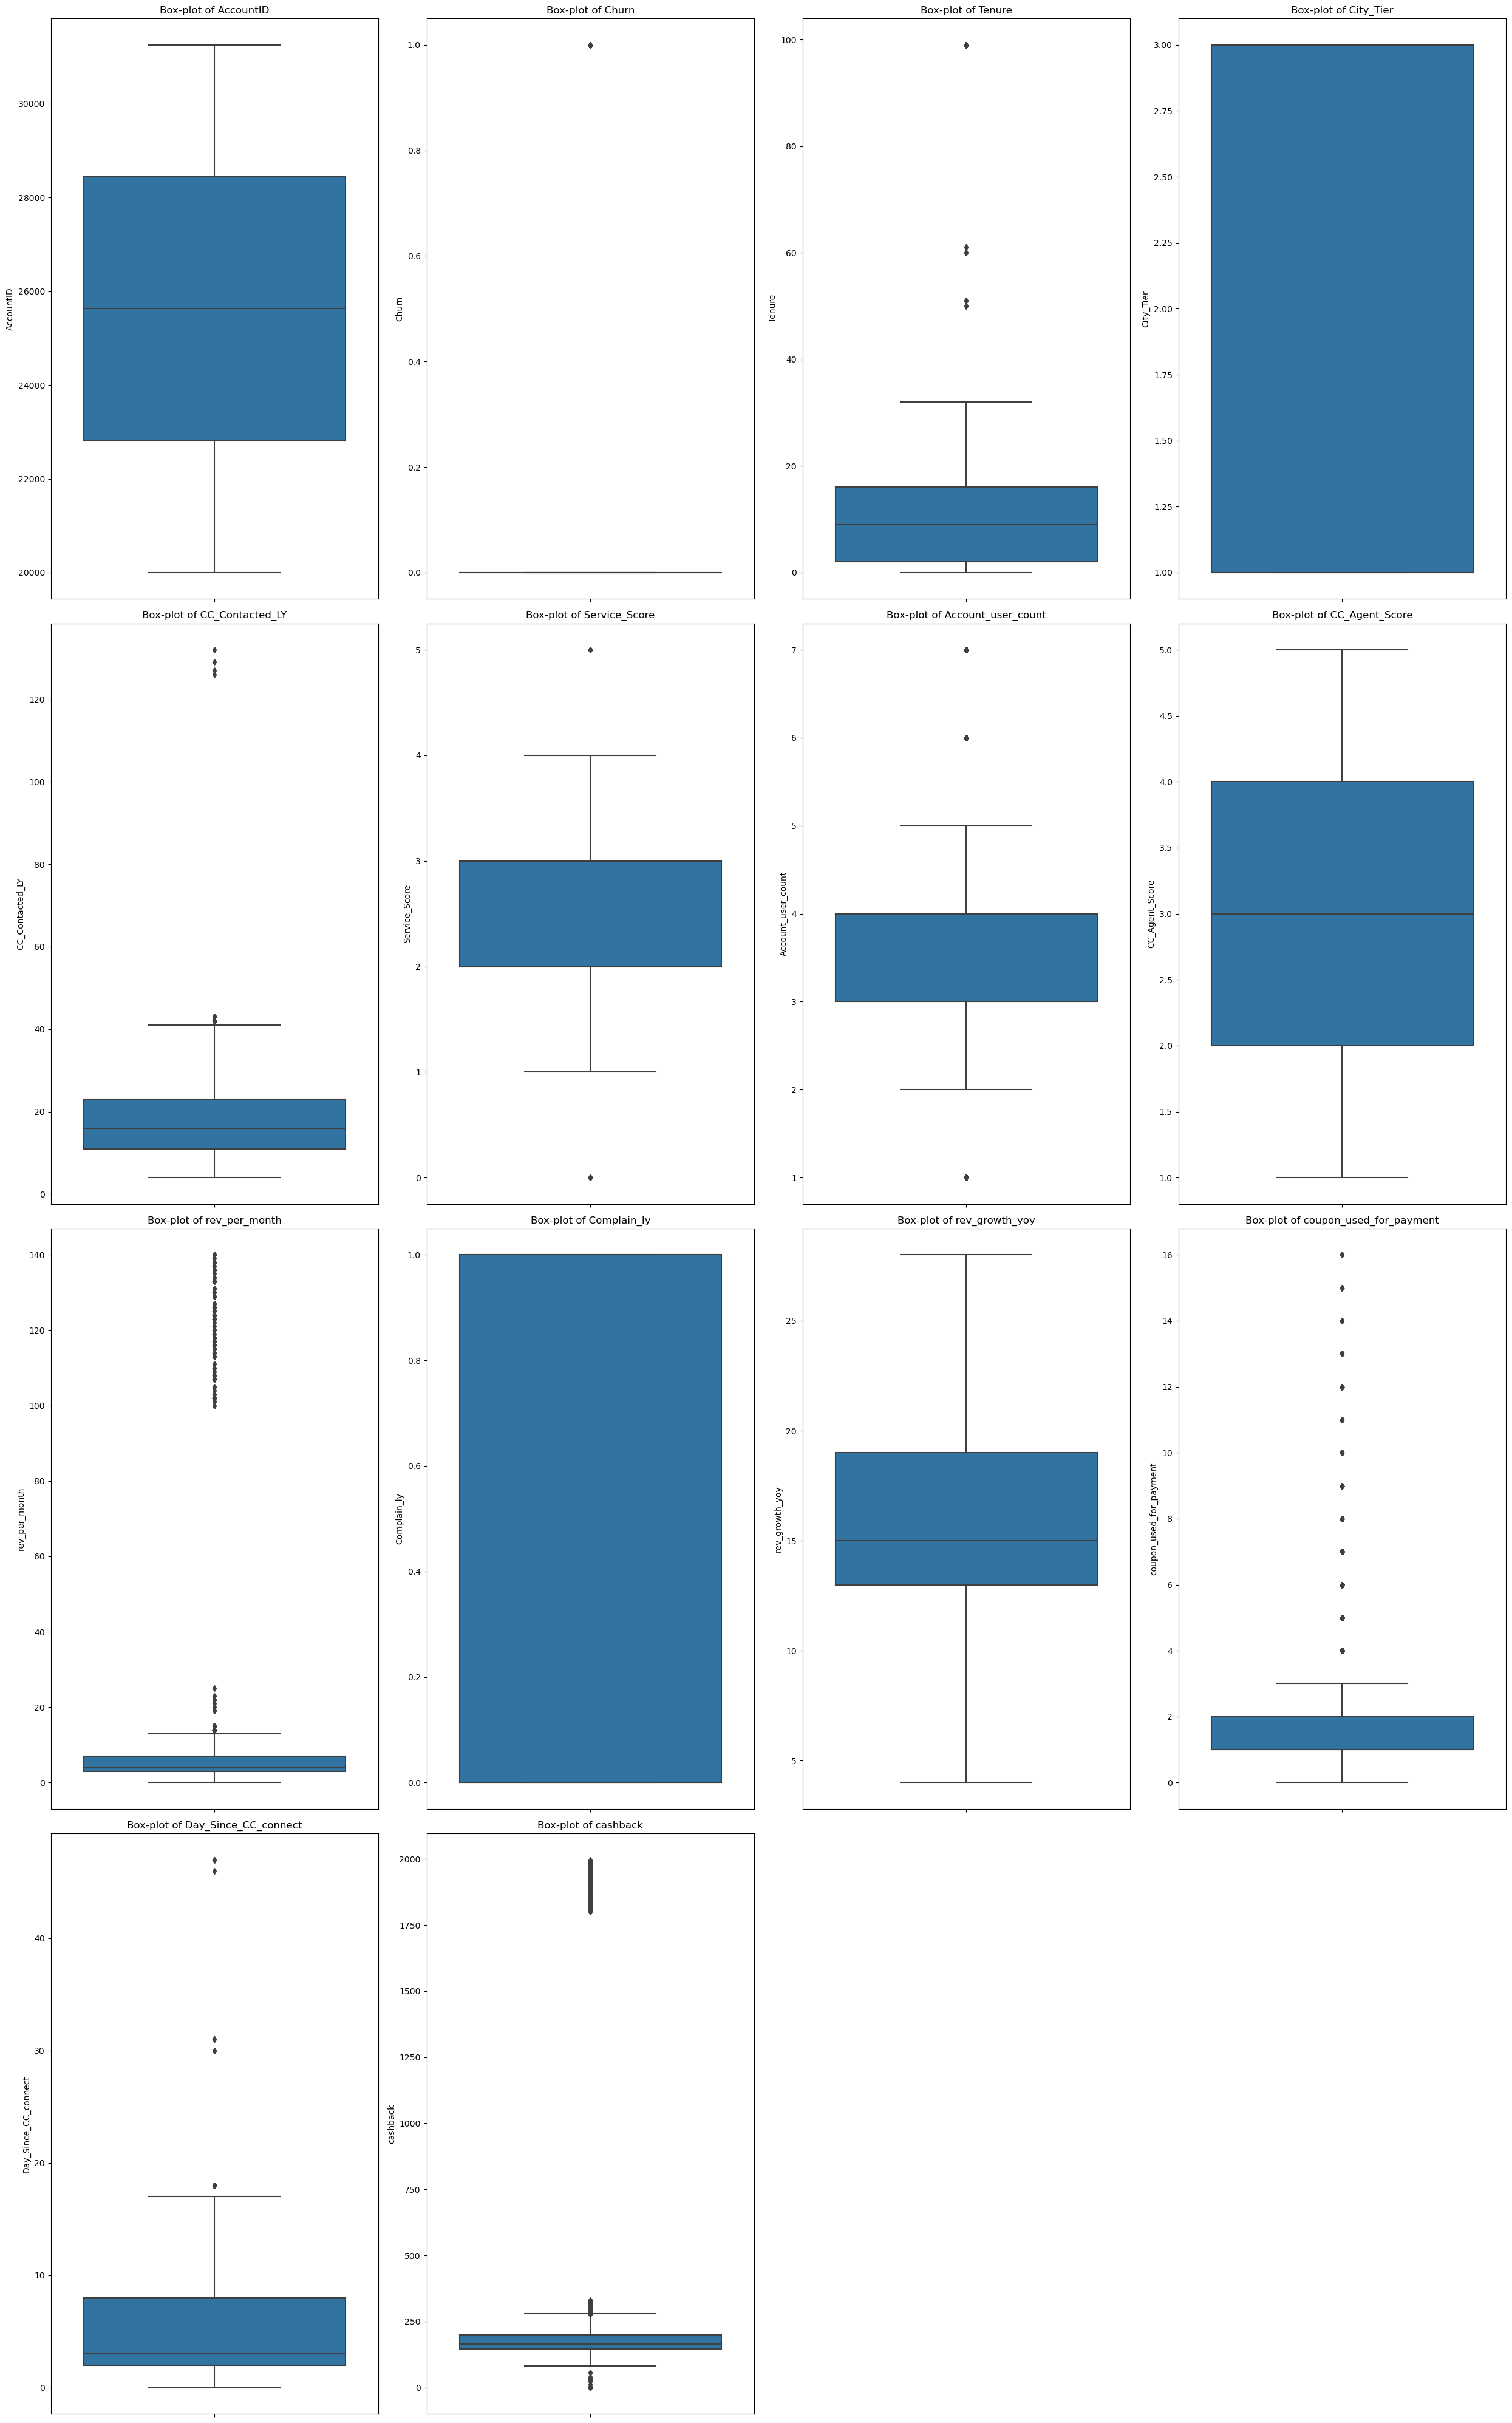

In [134]:
#multiple columns not showing up in box-plot because they are of non-numeric datatype
box_plot(df_customer_churn)

In [47]:
x=df_customer_churn.where(pd.notnull(df_customer_churn), np.nan)

In [48]:
df_customer_churn=x

In [49]:
df_customer_churn.head(20)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [50]:
df_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [51]:
x['cashback'] = pd.to_numeric(x['cashback'], errors='coerce')

In [52]:
df_customer_churn.head(20)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.90,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.60,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [53]:
df_customer_churn['Tenure'] = pd.to_numeric(df_customer_churn['Tenure'], errors='coerce')

In [54]:
df_customer_churn['Account_user_count'] = pd.to_numeric(df_customer_churn['Account_user_count'], errors='coerce')

In [55]:
df_customer_churn['rev_growth_yoy'] = pd.to_numeric(df_customer_churn['rev_growth_yoy'], errors='coerce')

In [56]:
df_customer_churn['coupon_used_for_payment'] = pd.to_numeric(df_customer_churn['coupon_used_for_payment'], errors='coerce')

In [57]:
df_customer_churn['Day_Since_CC_connect'] = pd.to_numeric(df_customer_churn['Day_Since_CC_connect'], errors='coerce')

In [58]:
df_customer_churn['cashback'] = pd.to_numeric(df_customer_churn['cashback'], errors='coerce')

In [59]:
df_customer_churn['rev_per_month'] = pd.to_numeric(df_customer_churn['rev_per_month'], errors='coerce')

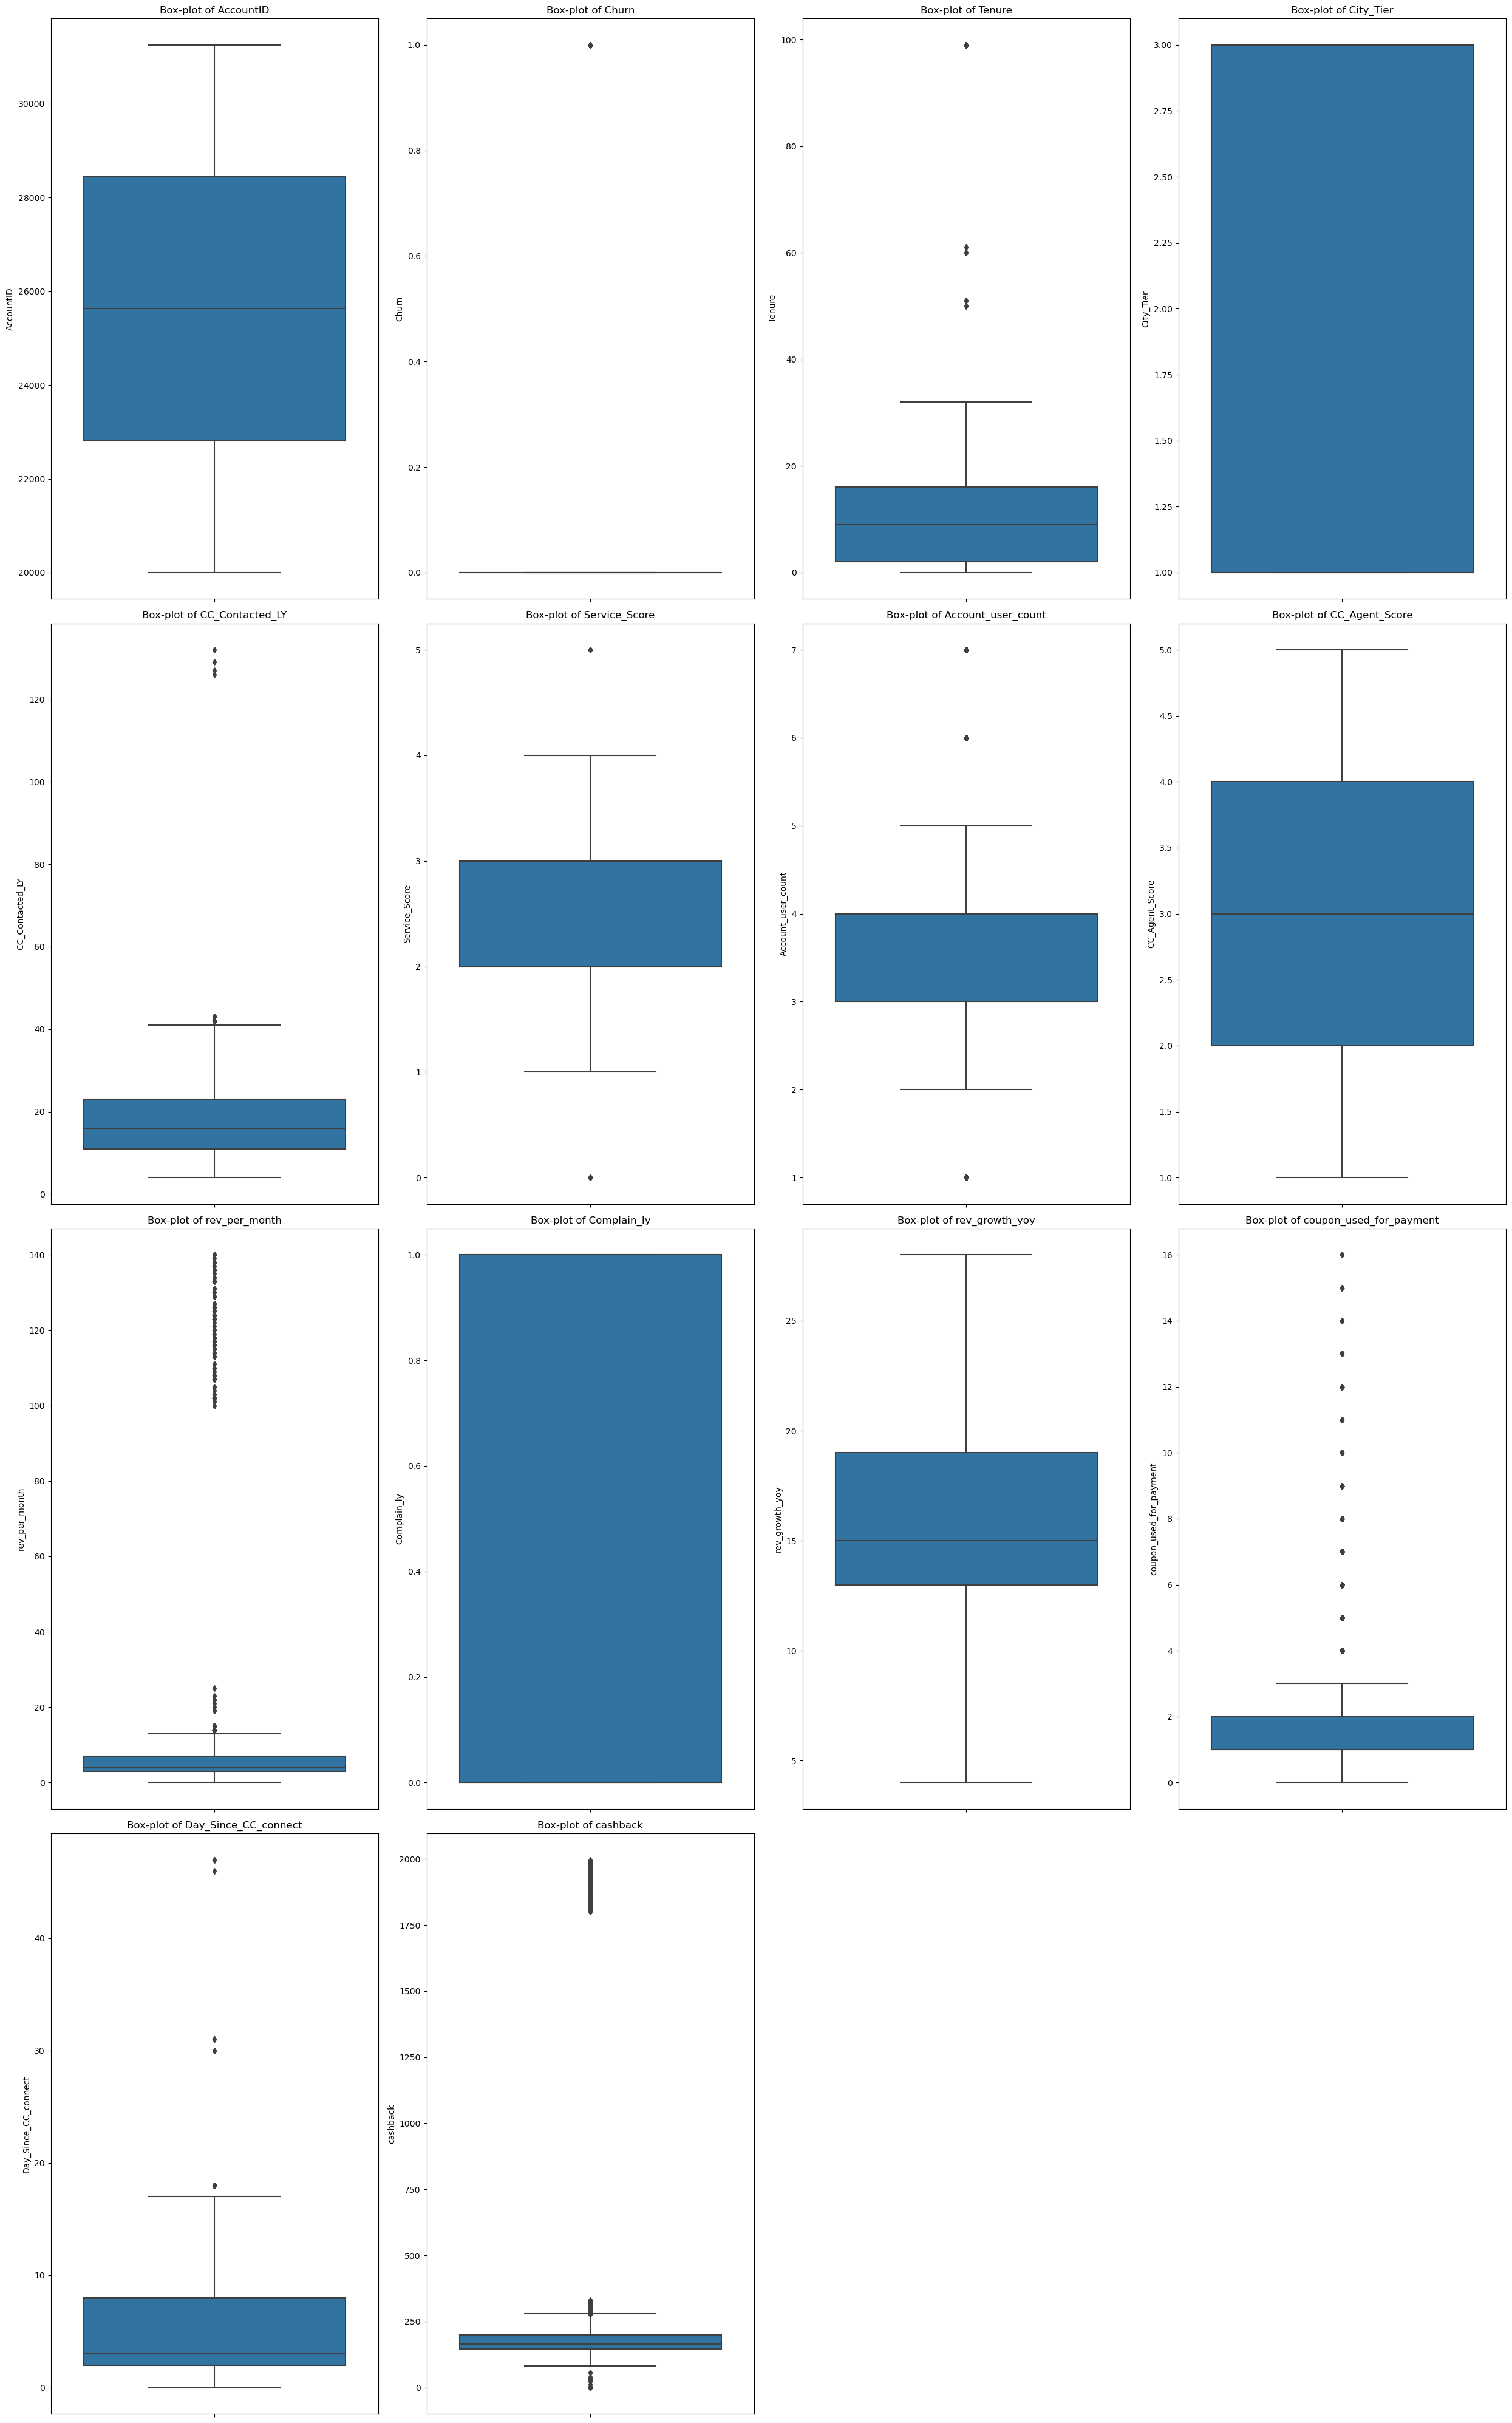

In [135]:
#More columns after converting the datatypes to numeric(int/float)
box_plot(df_customer_churn)

In [61]:
df_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

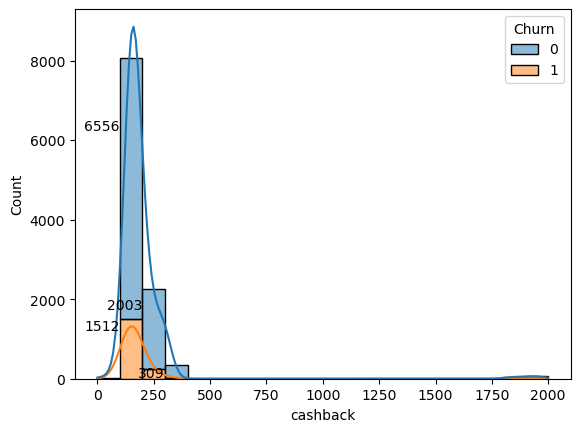

In [120]:
ax = sns.histplot(data=df_customer_churn, x= 'cashback', hue = 'Churn', kde = True, multiple = 'stack', bins =50, binwidth=100)
#ht=ax.patches.get_height()
for p in ax.patches:
    height=p.get_height()
    if height >300:
        y=height+20 if height % 2 ==1 else height-20
        ax.text(
        x=p.get_x(),
        y=y,
        s=f'{height:.0f}',
        ha='right',
        va='top'
        )
plt.show()

<Axes: xlabel='cashback', ylabel='Count'>

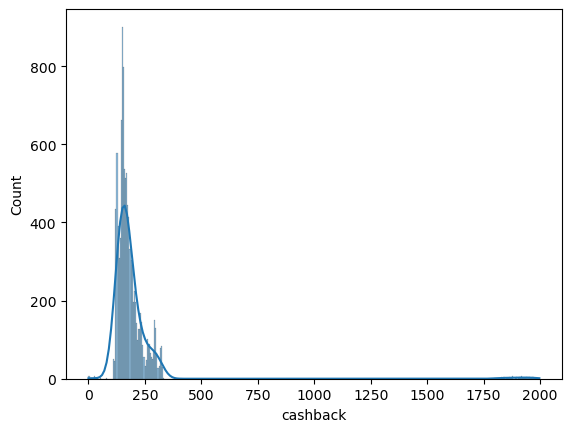

In [62]:
sns.histplot(df_customer_churn['cashback'], kde = True)

<Axes: xlabel='cashback', ylabel='Count'>

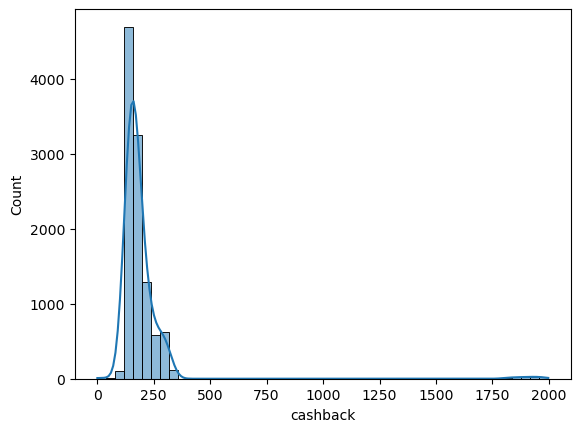

In [63]:
sns.histplot(df_customer_churn['cashback'],bins=50, kde = True)

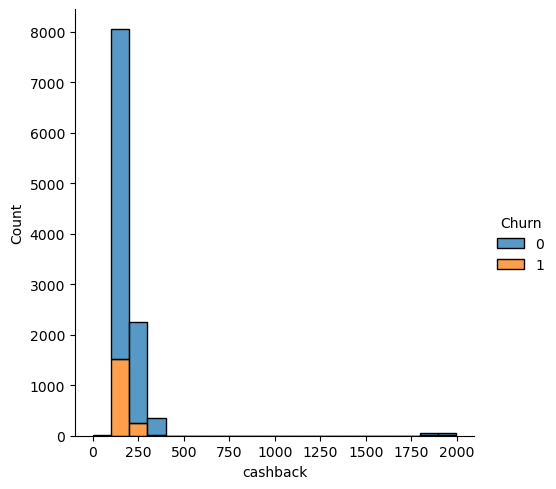

In [122]:
sns.displot(data=df_customer_churn, x='cashback', hue='Churn', bins=20, kind = 'hist', multiple = 'stack')

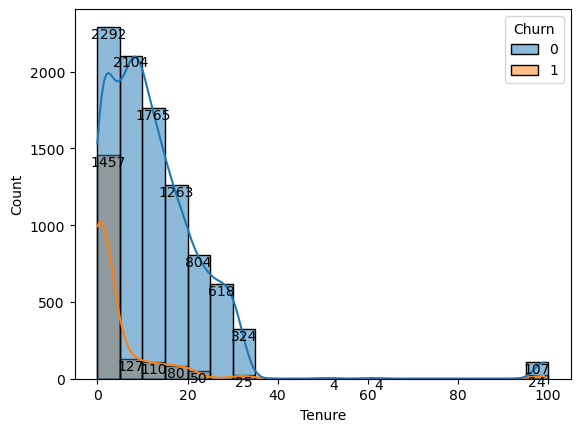

In [105]:
ax=sns.histplot(data=df_customer_churn, x='Tenure', hue='Churn', kde = True, binwidth=5)
for p in ax.patches:
    height=p.get_height()
    if height >0:
        ax.text(
        x=p.get_x()+p.get_width()/2,
        y=height,
        s=f'{height:.0f}',
        ha='center',
        va='top'
        )
plt.show()

<Axes: xlabel='Tenure', ylabel='Count'>

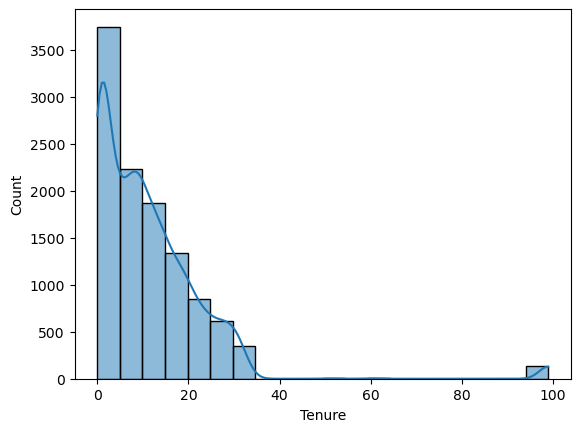

In [66]:
sns.histplot(df_customer_churn['Tenure'],bins=20, kde = True)

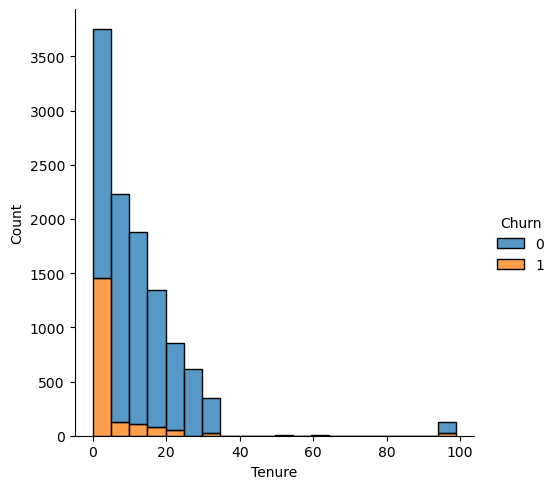

In [67]:
sns.displot(data=df_customer_churn, x='Tenure', hue='Churn',bins = 20, kind='hist', multiple='stack')

<Axes: xlabel='Day_Since_CC_connect', ylabel='Count'>

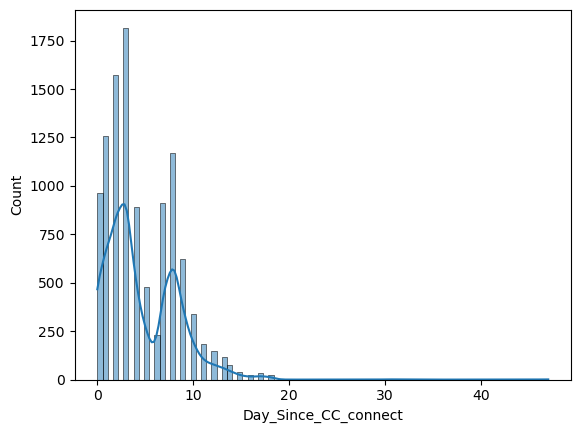

In [68]:
sns.histplot(df_customer_churn['Day_Since_CC_connect'], kde = True)

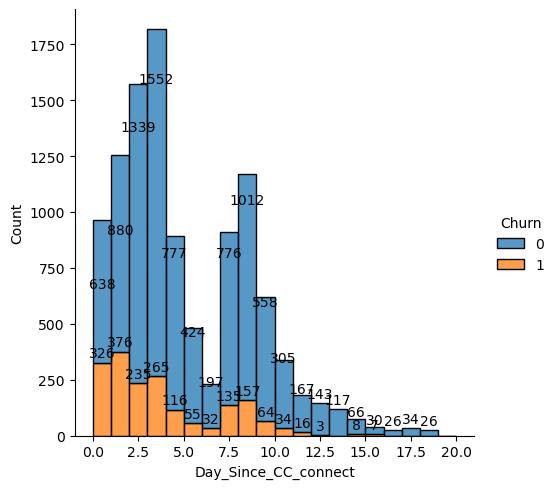

In [174]:
g=sns.displot(data=df_customer_churn, x='Day_Since_CC_connect',bins = 20, hue='Churn', kind='hist', multiple='stack', binrange=(0,20))
# Iterate through each subplot in the FacetGrid
for ax in g.axes.flat:
    # Iterate through each patch (bar) in the subplot
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with a height greater than zero
            ax.text(
                x=p.get_x() + p.get_width() / 2,  # X-coordinate of the label
                y=height+10 if y%2==1 else height-2,  # Y-coordinate of the label
                s=f'{height:.0f}',  # Text of the label
                ha='center',  # Horizontal alignment
                va='bottom'  # Vertical alignment
            )

In [70]:
df_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

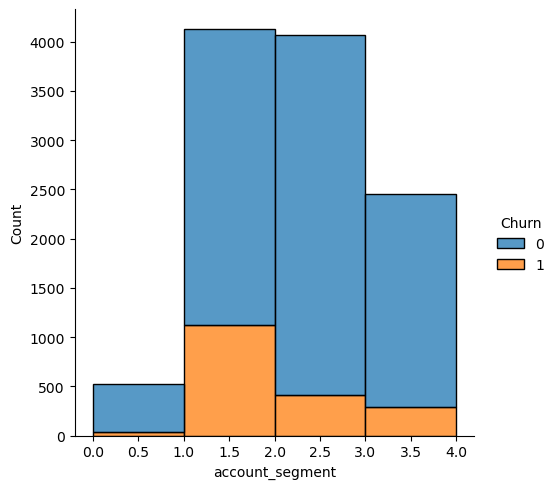

In [175]:
sns.displot(data = df_customer_churn, x='account_segment' , hue = 'Churn', kind = 'hist', multiple = 'stack', binwidth=1)

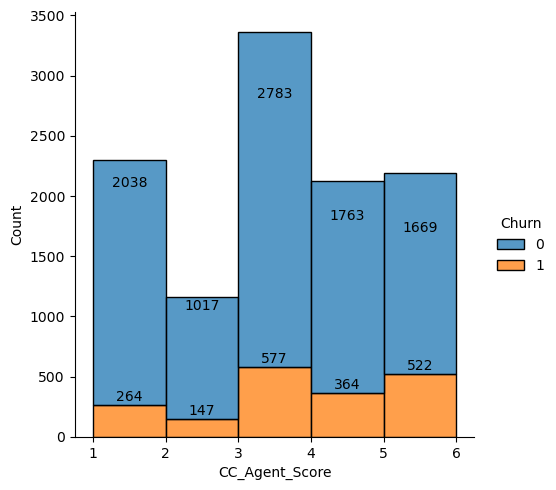

In [177]:
g=sns.displot(data = df_customer_churn, x='CC_Agent_Score' , hue = 'Churn', kind = 'hist', multiple = 'stack', binwidth=1, binrange=(1,6))
# Iterate through each subplot in the FacetGrid
for ax in g.axes.flat:
    # Iterate through each patch (bar) in the subplot
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with a height greater than zero
            ax.text(
                x=p.get_x() + p.get_width() / 2,  # X-coordinate of the label
                y=height+10 if y%2==1 else height-2,  # Y-coordinate of the label
                s=f'{height:.0f}',  # Text of the label
                ha='center',  # Horizontal alignment
                va='bottom'  # Vertical alignment
            )

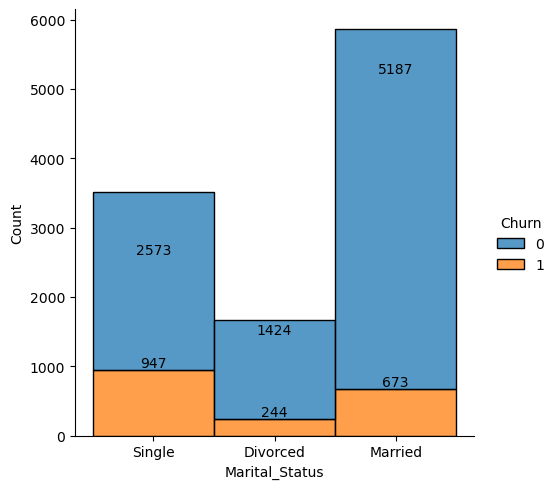

In [130]:
g=sns.displot(data = df_customer_churn, x='Marital_Status' , hue = 'Churn', kind = 'hist', multiple = 'stack', binwidth=1)
# Iterate through each subplot in the FacetGrid
for ax in g.axes.flat:
    # Iterate through each patch (bar) in the subplot
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with a height greater than zero
            ax.text(
                x=p.get_x() + p.get_width() / 2,  # X-coordinate of the label
                y=height,  # Y-coordinate of the label
                s=f'{height:.0f}',  # Text of the label
                ha='center',  # Horizontal alignment
                va='bottom'  # Vertical alignment
            )

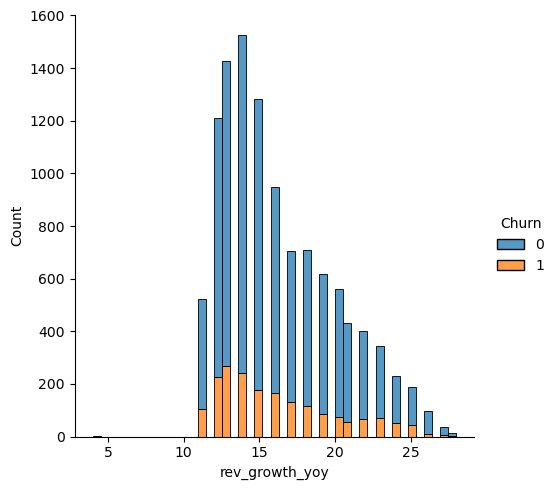

In [74]:
#sns.histplot(df_customer_churn['rev_growth_yoy'], kde = True)
sns.displot(data= df_customer_churn, x='rev_growth_yoy', hue = 'Churn', kind = 'hist', multiple = 'stack')

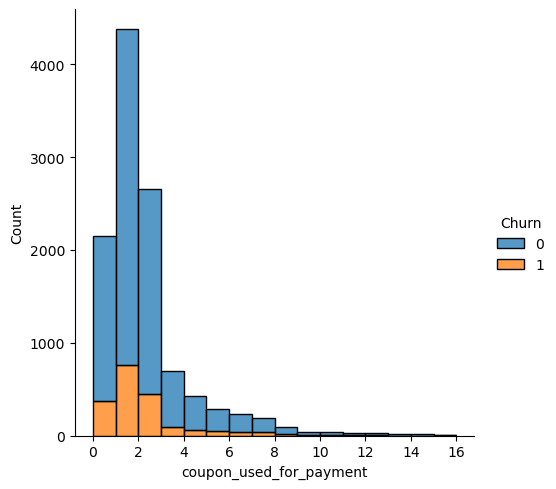

In [75]:
sns.displot(data= df_customer_churn, x='coupon_used_for_payment', hue = 'Churn', kind = 'hist', multiple = 'stack', binwidth=1)

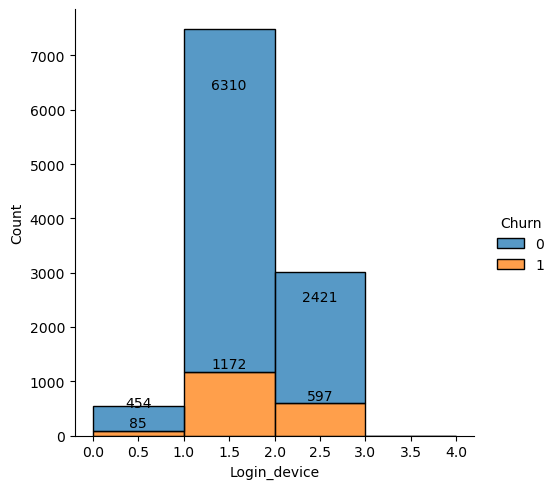

In [185]:
g=sns.displot(data= df_customer_churn, x='Login_device', hue = 'Churn', kind = 'hist', multiple = 'stack', binwidth=1, binrange = (0,4))
for ax in g.axes.flat:
    # Iterate through each patch (bar) in the subplot
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with a height greater than zero
            ax.text(
                x=p.get_x() + p.get_width() / 2,  # X-coordinate of the label
                y=height+10 if y%2==1 else height-2,  # Y-coordinate of the label
                s=f'{height:.0f}',  # Text of the label
                ha='center',  # Horizontal alignment
                va='bottom'  # Vertical alignment
            )

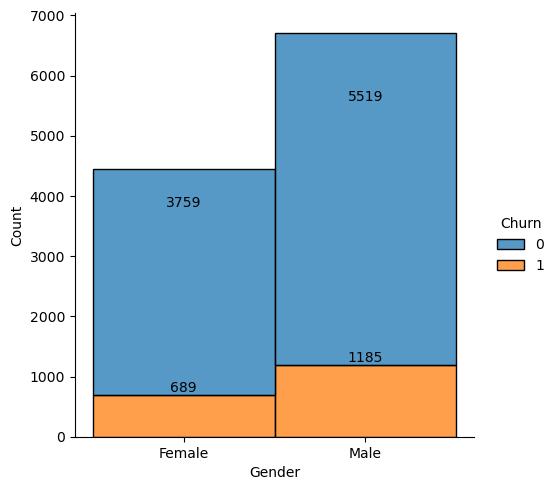

In [131]:
g=sns.displot(data= df_customer_churn, x='Gender', hue = 'Churn', kind = 'hist', multiple = 'stack', binwidth=1)
# Iterate through each subplot in the FacetGrid
for ax in g.axes.flat:
    # Iterate through each patch (bar) in the subplot
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with a height greater than zero
            ax.text(
                x=p.get_x() + p.get_width() / 2,  # X-coordinate of the label
                y=height+10 if y%2==1 else height-2,  # Y-coordinate of the label
                s=f'{height:.0f}',  # Text of the label
                ha='center',  # Horizontal alignment
                va='bottom'  # Vertical alignment
            )

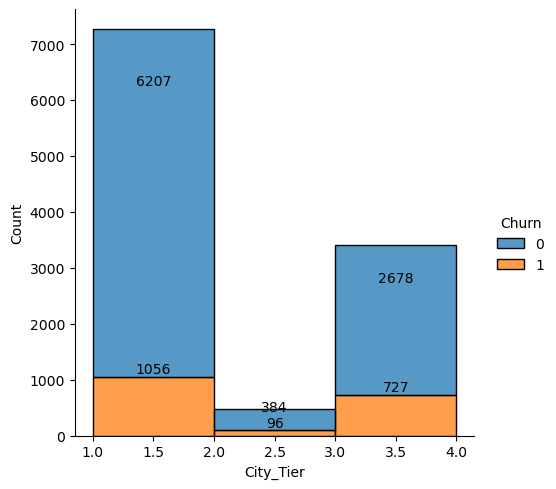

In [182]:
g=sns.displot(data= df_customer_churn, x='City_Tier', hue = 'Churn', kind = 'hist', multiple = 'stack', binwidth=1, binrange=(1,4))
# Iterate through each subplot in the FacetGrid
for ax in g.axes.flat:
    # Iterate through each patch (bar) in the subplot
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with a height greater than zero
            ax.text(
                x=p.get_x() + p.get_width() / 2,  # X-coordinate of the label
                y=height+10 if y%2==1 else height-2,  # Y-coordinate of the label
                s=f'{height:.0f}',  # Text of the label
                ha='center',  # Horizontal alignment
                va='bottom'  # Vertical alignment
            )

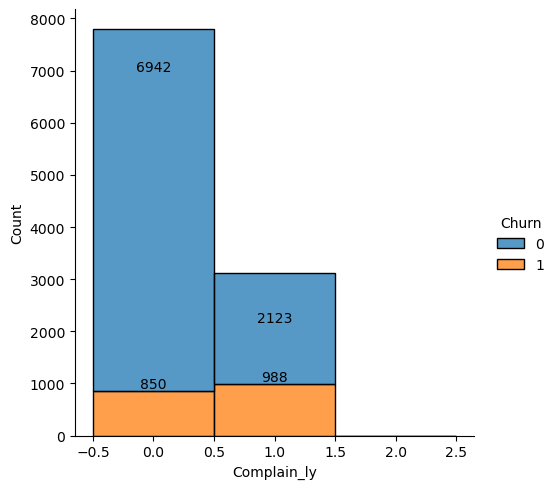

In [150]:
g=sns.displot(data= df_customer_churn, x='Complain_ly', hue = 'Churn', kind = 'hist', multiple = 'stack', binwidth=1, binrange=(0,2), discrete = True)
# Iterate through each subplot in the FacetGrid
for ax in g.axes.flat:
    # Iterate through each patch (bar) in the subplot
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with a height greater than zero
            ax.text(
                x=p.get_x() + p.get_width() / 2,  # X-coordinate of the label
                y=height,  # Y-coordinate of the label
                s=f'{height:.0f}',  # Text of the label
                ha='center',  # Horizontal alignment
                va='bottom'  # Vertical alignment
            )

In [156]:
df_customer_churn['Complain_ly'].value_counts()

Complain_ly
0.0    7792
1.0    3111
Name: count, dtype: int64

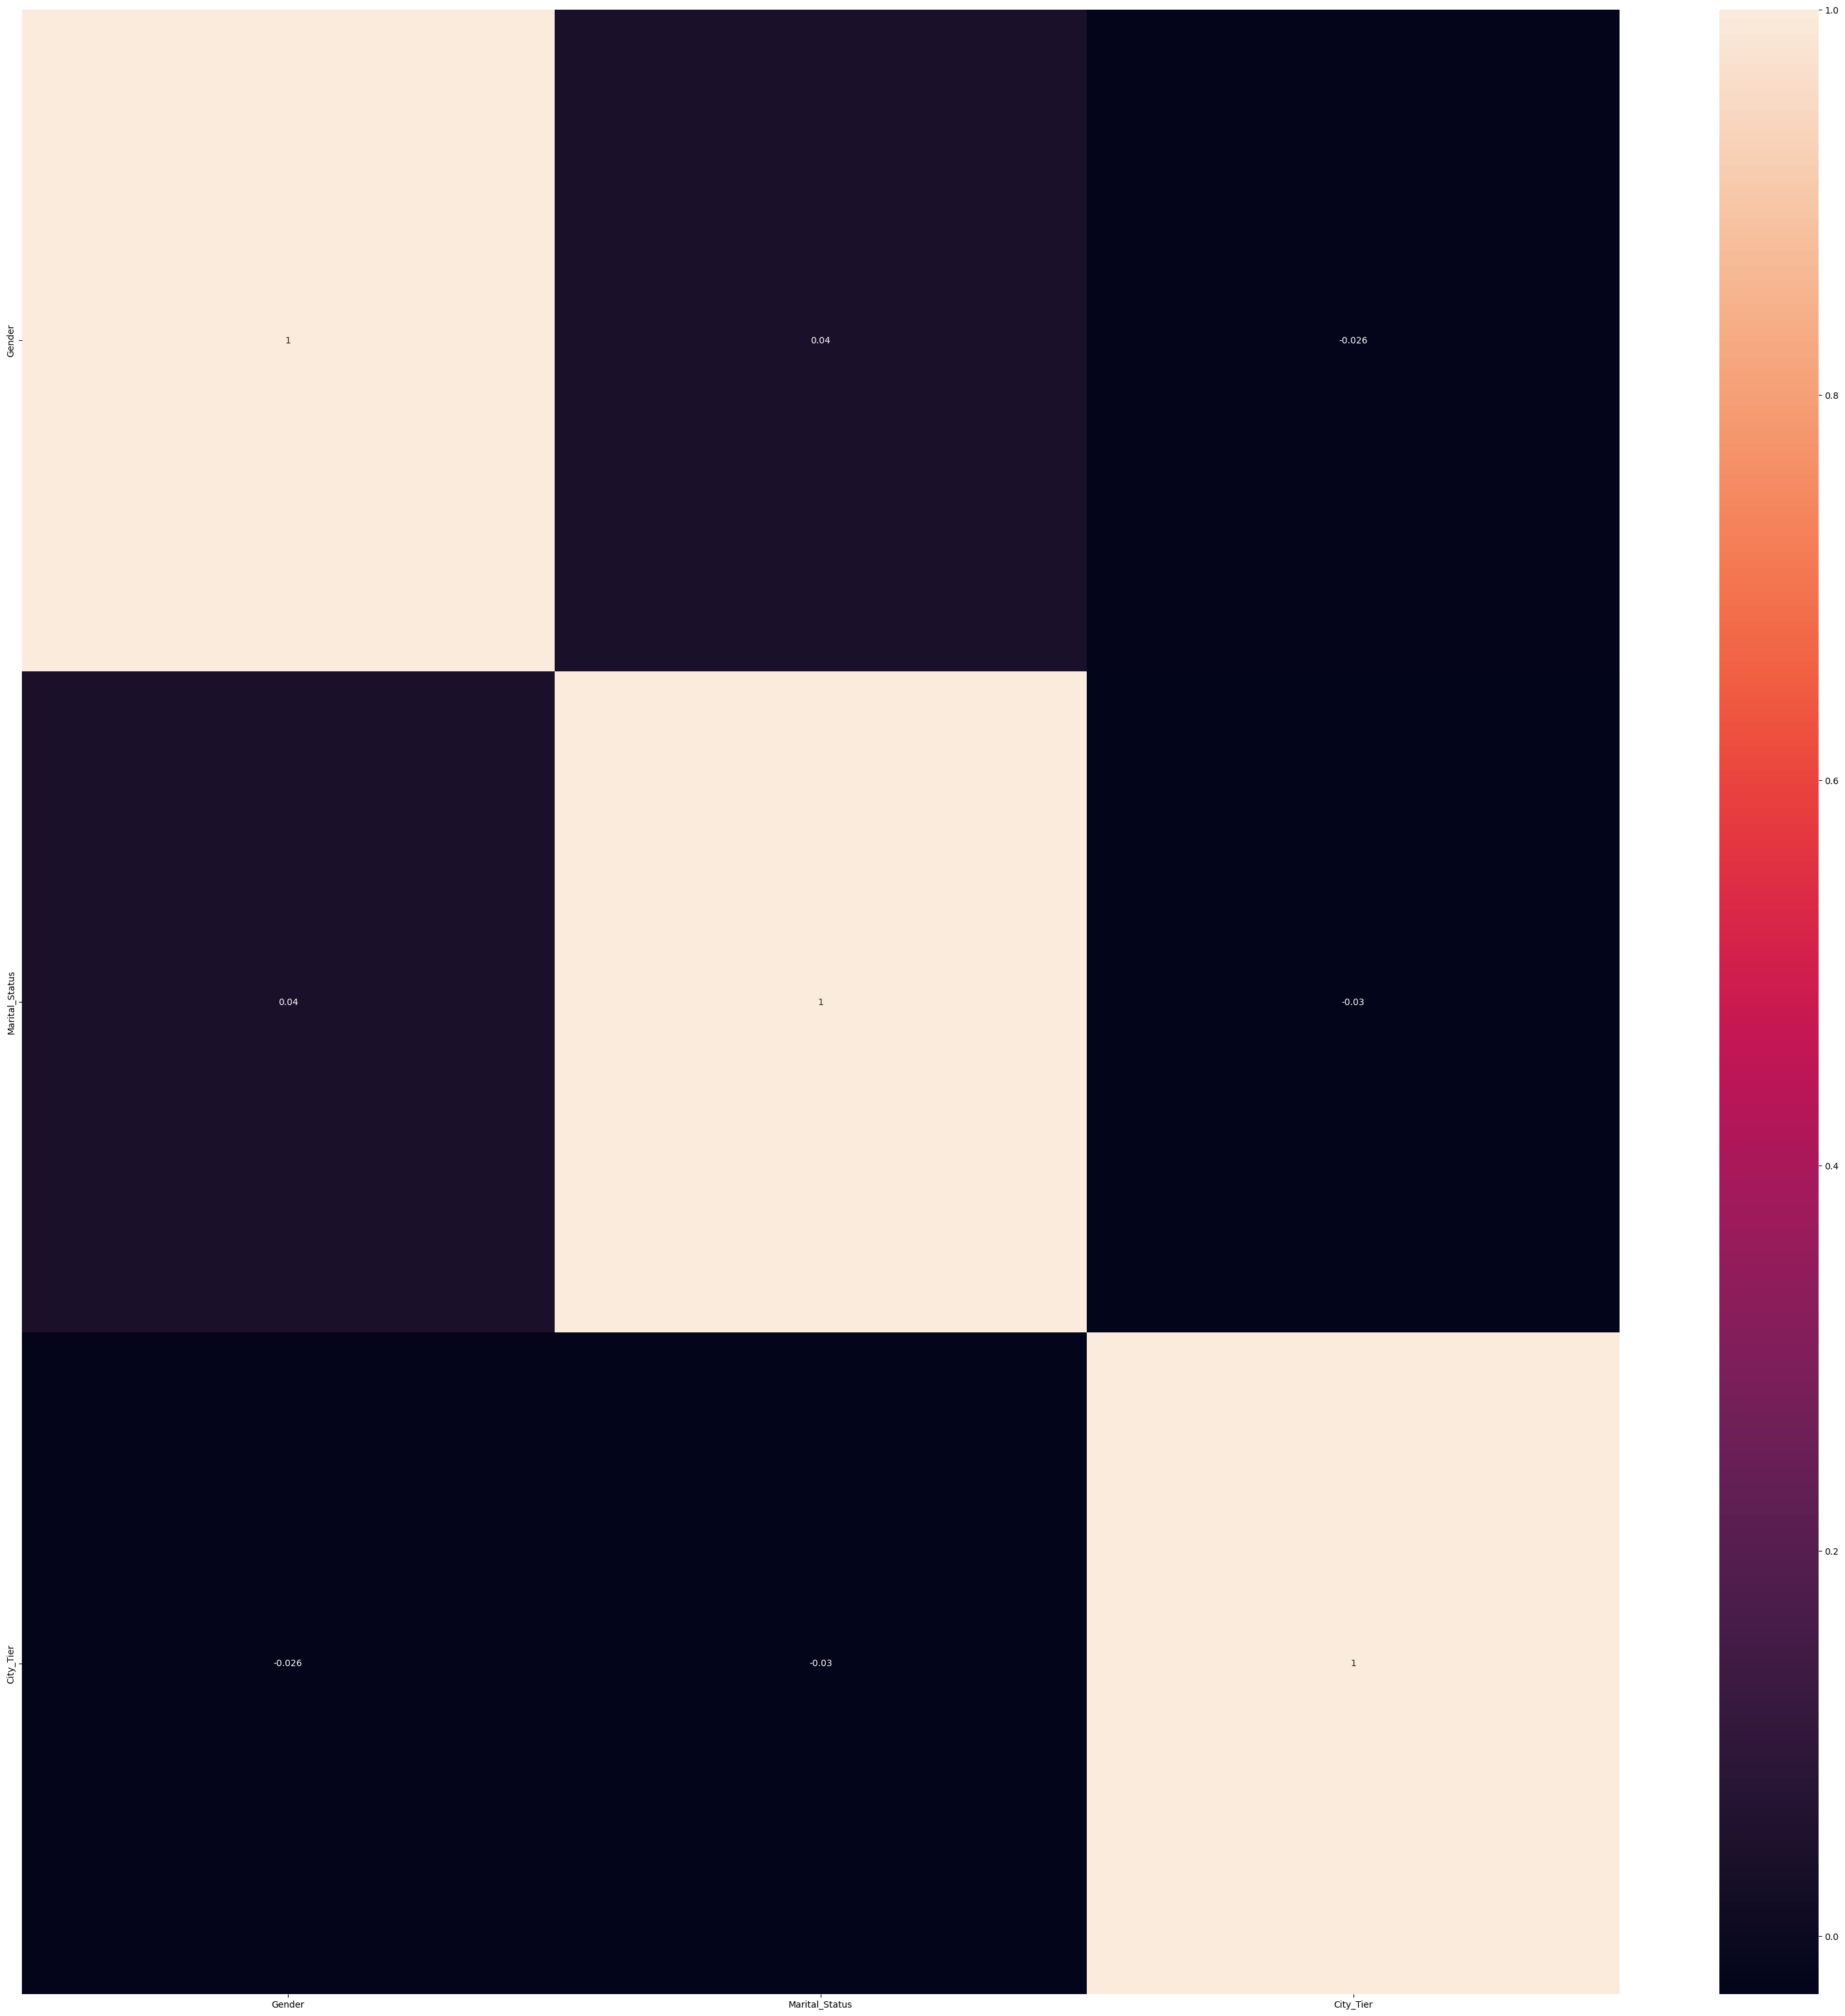

In [171]:
#df_customer_churn['Gender','Marital_Status','City_Tier']
#plotting correlation matrix
gyhujk=df_customer_churn[['Gender','Marital_Status','City_Tier']].copy()
correlation_matrix = gyhujk.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [77]:
#created a backup of the dataframe before encoding and null values imputation
df_customer_churn_treated=df_customer_churn

In [97]:
df_customer_churn_treated.to_csv('customer_churn_treated_data.csv')

Encoding

Conversion into categorical columns and fetching the codes will create a category of NaNs also. So, proceeded with replacing the categories into codes manually so that the nulls/NaNs are not treated as  a separate category. 

In [157]:
#before scaling, encoding on categorical columns are performed
df_customer_churn_treated['Payment'] = df_customer_churn_treated['Payment'].replace('Debit Card',0).replace('Credit Card',1).replace('E wallet',2).replace('Cash on Delivery',3).replace('UPI',4)

In [158]:
df_customer_churn_treated['Gender'] = df_customer_churn_treated['Gender'].replace('Female',0).replace('F',0).replace('Male',1).replace('M',1)

In [159]:
df_customer_churn_treated['account_segment'] = df_customer_churn_treated['account_segment'].replace('Regular',0).replace('Regular Plus',1).replace('Regular +',1).replace('Super',2).replace('Super Plus',3).replace('Super +',3).replace('HNI',4)

In [160]:
df_customer_churn_treated['Marital_Status'] = df_customer_churn_treated['Marital_Status'].replace('Single',0).replace('Divorced',1).replace('Married',2)

In [161]:
df_customer_churn_treated['Login_device'] = df_customer_churn_treated['Login_device'].replace('Tablet',0).replace('Mobile',1).replace('Computer',2)

In [162]:
df_customer_churn_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  float64
 6   Gender                   11152 non-null  float64
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  float64
 9   account_segment          11163 non-null  float64
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  float64
 12  rev_per_month            11158 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

Scaling

In [200]:
#KNN imputation for missing value treatment
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [201]:
#Since AccountID is not contributing to the data provided in any way, this is dropped.
X=df_customer_churn_treated.drop(columns=['Churn','AccountID'], axis=1)
y=df_customer_churn_treated['Churn']

In [202]:
df_customer_churn_treated['Gender'].value_counts()
#df_customer_churn_orig_data['Gender'].value_counts()
#Male      6328
#Female    4178
#M          376
#F          270

Gender
1.0    6704
0.0    4448
Name: count, dtype: int64

Performing scaling

In [203]:
#perform scalar transformation
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X)
df_customer_churn_treated=pd.DataFrame(scaled_data, columns=X.columns)

In [319]:
scaled_data

array([[-0.55770058,  1.47115738, -1.34047911, ...,  0.09925085,
        -0.20322371, -0.43075419],
       [-0.86568871, -0.71469661, -1.11456374, ..., -1.25307612,
        -0.42169285, -0.43075419],
       [-0.86568871, -0.71469661,  1.37050532, ..., -0.44167994,
                nan, -0.43075419],
       ...,
       [-0.78869168, -0.71469661, -0.43681763, ..., -0.17121454,
        -0.02695947, -0.43075419],
       [ 0.90524302,  1.47115738, -0.77569068, ...,  1.18111243,
        -0.09144229,  1.48739649],
       [-0.24971246, -0.71469661,  0.46684384, ..., -0.44167994,
        -0.11864598, -0.43075419]])

In [320]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,0.0,0.0,3.0,3.0,2.0,2.0,0.0,9.0,1.0,11,1,5.0,159.93,1.0
1,0.0,1.0,8.0,4.0,1.0,3.0,4.0,1.0,3.0,0.0,7.0,1.0,15,0,0.0,120.90,1.0
2,0.0,1.0,30.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,6.0,1.0,14,0,3.0,NaN,1.0
3,0.0,3.0,15.0,0.0,1.0,2.0,4.0,2.0,5.0,0.0,8.0,0.0,23,0,3.0,134.07,1.0
4,0.0,1.0,12.0,1.0,1.0,2.0,3.0,1.0,5.0,0.0,3.0,0.0,11,1,3.0,129.60,1.0


In [318]:
#data is scaled
df_customer_churn_treated.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn
0,-0.557701,1.471157,-1.340479,-0.887768,-1.227678,0.134344,-0.685870,0.087077,-0.772983,-1.351326,0.260406,1.582612,-1.382086,-0.401377,0.099251,-0.203224,-0.430754,1
1,-0.865689,-0.714697,-1.114564,2.338139,0.814546,0.134344,0.180836,-0.823073,-0.048194,-1.351326,0.088538,1.582612,-0.317470,-0.909186,-1.253076,-0.421693,-0.430754,1
2,-0.865689,-0.714697,1.370505,-0.887768,0.814546,-1.243919,0.180836,-0.823073,-0.048194,-1.351326,0.002603,1.582612,-0.583624,-0.909186,-0.441680,-0.402885,-0.430754,1
3,-0.865689,1.471157,-0.323860,-0.887768,0.814546,-1.243919,0.180836,0.087077,1.401386,-1.351326,0.174472,-0.631867,1.811761,-0.909186,-0.441680,-0.347974,-0.430754,1
4,-0.865689,-0.714697,-0.662733,-0.081291,0.814546,-1.243919,-0.685870,-0.823073,1.401386,-1.351326,-0.255200,-0.631867,-1.382086,-0.401377,-0.441680,-0.372995,-0.430754,1


In [205]:
df_customer_churn_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11158 non-null  float64
 1   City_Tier                11148 non-null  float64
 2   CC_Contacted_LY          11158 non-null  float64
 3   Payment                  11151 non-null  float64
 4   Gender                   11152 non-null  float64
 5   Service_Score            11162 non-null  float64
 6   Account_user_count       11148 non-null  float64
 7   account_segment          11163 non-null  float64
 8   CC_Agent_Score           11144 non-null  float64
 9   Marital_Status           11048 non-null  float64
 10  rev_per_month            11158 non-null  float64
 11  Complain_ly              10903 non-null  float64
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

Perform KNN Imputation

In [206]:
df_customer_churn_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11158 non-null  float64
 1   City_Tier                11148 non-null  float64
 2   CC_Contacted_LY          11158 non-null  float64
 3   Payment                  11151 non-null  float64
 4   Gender                   11152 non-null  float64
 5   Service_Score            11162 non-null  float64
 6   Account_user_count       11148 non-null  float64
 7   account_segment          11163 non-null  float64
 8   CC_Agent_Score           11144 non-null  float64
 9   Marital_Status           11048 non-null  float64
 10  rev_per_month            11158 non-null  float64
 11  Complain_ly              10903 non-null  float64
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

In [207]:
#perform KNN Imputation
imputer = KNNImputer()
imputed_data=imputer.fit_transform(df_customer_churn_treated)
df_customer_churn_treated=pd.DataFrame(imputed_data, columns=df_customer_churn_treated.columns)

In [208]:
df_customer_churn_treated=pd.concat([df_customer_churn_treated,df_customer_churn['Churn']], axis=1)
#df_customer_churn_treated.drop(columns='Churn', axis=1, inplace = True)

In [209]:
print(df_customer_churn_treated.isnull().sum().sum())

0


In [210]:
df_customer_churn_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  float64
 4   Gender                   11260 non-null  float64
 5   Service_Score            11260 non-null  float64
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  float64
 8   CC_Agent_Score           11260 non-null  float64
 9   Marital_Status           11260 non-null  float64
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  float64
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

In [211]:
df_customer_churn_treated.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,11260.0,-2.434411e-04,0.997270,-0.865689,-0.711695,-0.172715,0.366264,6.757017
City_Tier,11260.0,6.949654e-04,0.998754,-0.714697,-0.714697,-0.714697,1.471157,1.471157
CC_Contacted_LY,11260.0,-1.282494e-03,0.997503,-1.566394,-0.775691,-0.210902,0.579802,12.892189
Payment,11260.0,7.887862e-04,0.997141,-0.887768,-0.887768,-0.081291,0.725186,2.338139
Gender,11260.0,4.853529e-04,0.996441,-1.227678,-1.227678,0.814546,0.814546,0.814546
Service_Score,11260.0,5.082693e-04,0.997234,-4.000444,-1.243919,0.134344,0.134344,2.890870
Account_user_count,11260.0,-1.464894e-03,0.997732,-2.419280,-0.685870,0.180836,0.180836,2.780952
account_segment,11260.0,-5.269895e-04,0.998920,-1.733223,-0.823073,0.087077,0.087077,1.907376
CC_Agent_Score,11260.0,-4.449932e-04,0.997909,-1.497773,-0.772983,-0.048194,0.676596,1.401386
Marital_Status,11260.0,-3.270387e-04,0.995779,-1.351326,-1.351326,0.878948,0.878948,0.878948


The data has now been encoded, scaled and imputed for null(NaN) values

In [212]:
def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    LL=Q1-(1.5*IQR)
    UL=Q3+(1.5*IQR)
    return(LL,UL)

In [213]:
column_list = df_customer_churn_treated.columns
for i in column_list:
    if i in ['Tenure','Day_Since_CC_connect','CC_Contacted_LY','Account_user_count','rev_per_month','cashback']:
        LL,UL=remove_outlier(df_customer_churn_treated[i])
        df_customer_churn_treated[i]=np.where(df_customer_churn_treated[i]>UL,UL, df_customer_churn_treated[i])
        df_customer_churn_treated[i]=np.where(df_customer_churn_treated[i]<LL,LL, df_customer_churn_treated[i])

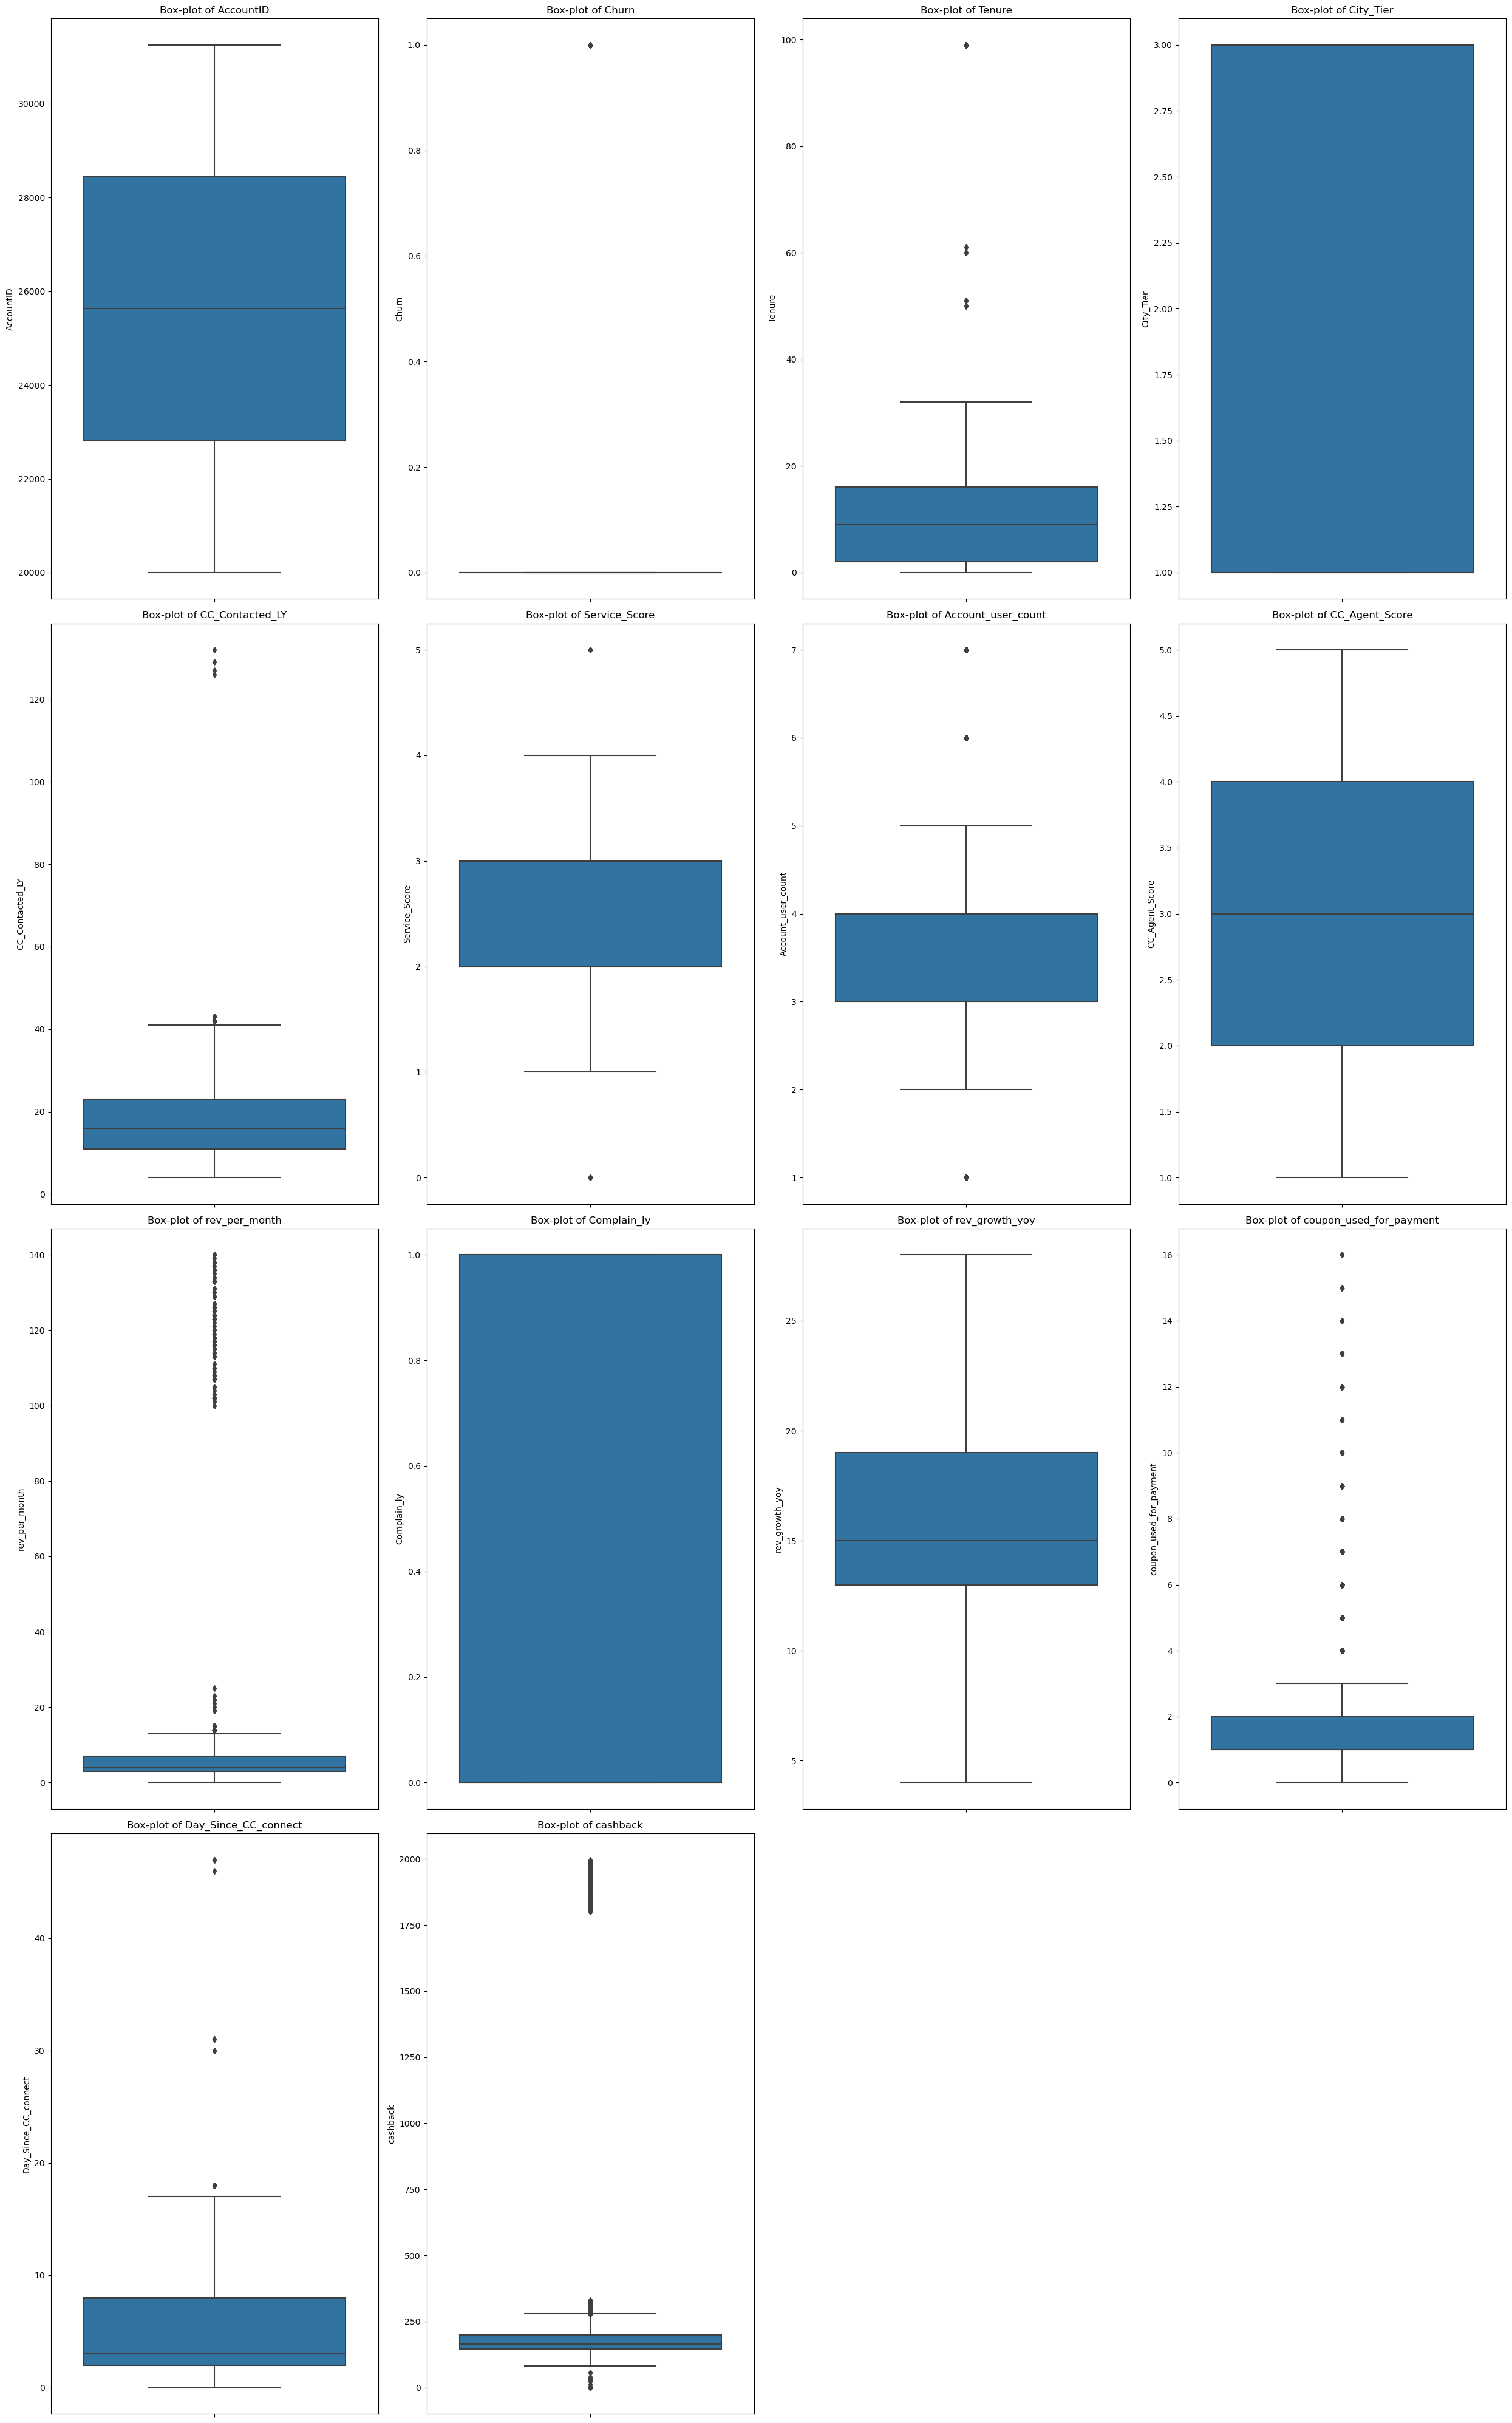

In [136]:
box_plot(df_customer_churn_treated)

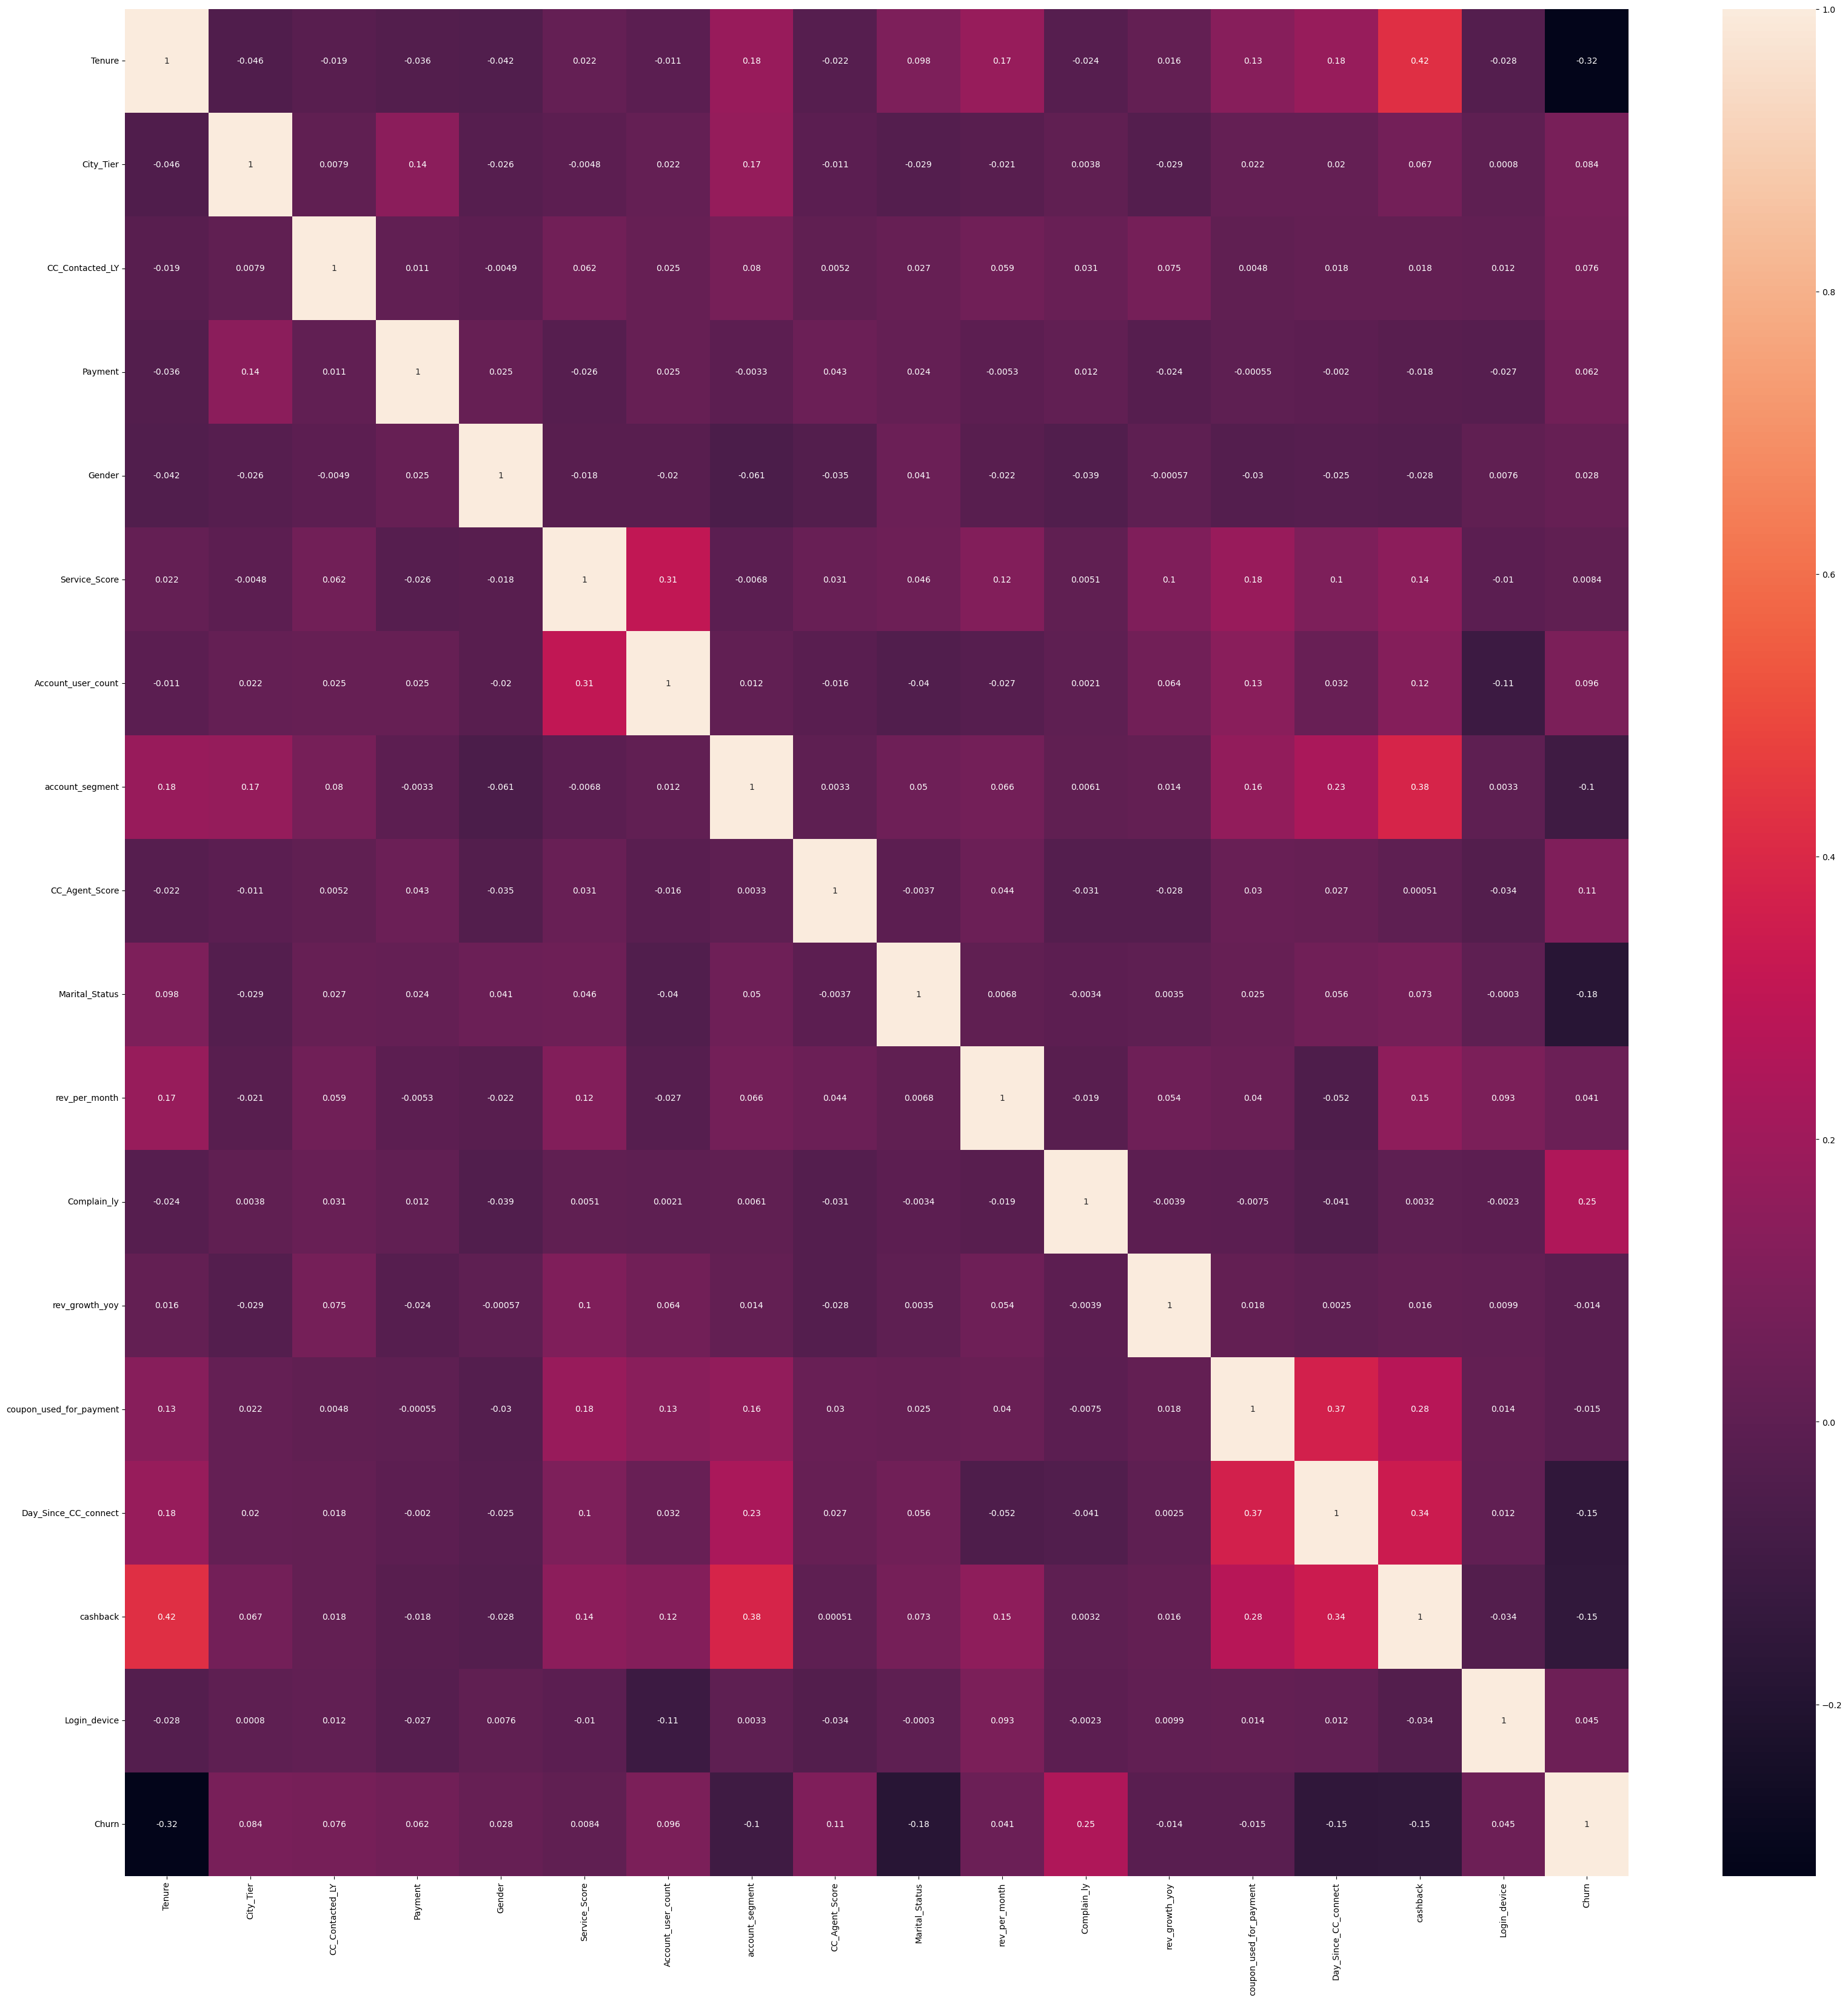

In [215]:
#plotting correlation matrix
correlation_matrix = df_customer_churn_treated.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

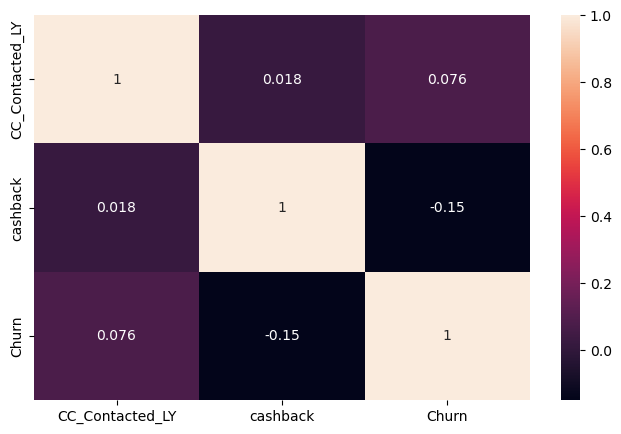

In [305]:
#plotting correlation matrix for the attributes that are non-categorical in nature and were identified by the chosen models 
#as most important for making predictions
selected_columns = ['CC_Contacted_LY', 'cashback', 'Churn']
subset_df = df_customer_churn_treated[selected_columns]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Perform Clustering

In [216]:
from sklearn.cluster import KMeans

In [217]:
kmeans = KMeans(n_clusters=1)

In [218]:
kmeans = KMeans(n_clusters=1)
kmeans.fit(df_customer_churn_treated)
kmeans.inertia_

161161.57139169917

In [219]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_customer_churn_treated)
kmeans.inertia_

149020.174149881

In [220]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_customer_churn_treated)
kmeans.inertia_

140549.5603951662

In [221]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_customer_churn_treated)
kmeans.inertia_

134126.12723959258

In [222]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_customer_churn_treated)
kmeans.inertia_

129738.68538197319

In [223]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_customer_churn_treated)
kmeans.inertia_

125376.73503840066

Text(0, 0.5, 'Inertia')

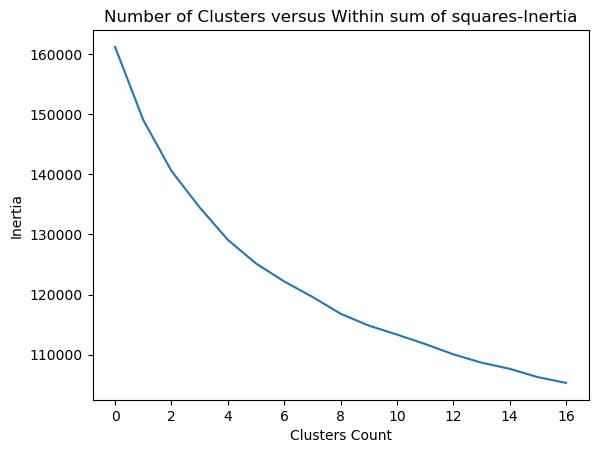

In [224]:
#plot the within-sum-of-squares(inertia) values
wss=[]
for i in range(1,18):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_customer_churn_treated)
    wss.append(kmeans.inertia_)
plt.plot(wss)
plt.title('Number of Clusters versus Within sum of squares-Inertia')
plt.xlabel('Clusters Count')
plt.ylabel('Inertia')

No Inflection point observed in the above plot, indicating that there might not be enough value in creating clusters for this data set. 

In [225]:
#confirm statistical significance of correlation of the data
from factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_customer_churn_treated)
p_value

0.0

In [226]:
#confirm adequacy of sample size
#kmo_model >= 0.6 is good and kmo_model<0.6 is unacceptable
from factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_customer_churn_treated)
kmo_model

0.6236471876061505

In [227]:
#Assuming the columns related to Customer Care will have overlapping behaviour. Hence, selecting such features for clustering
cluster = df_customer_churn_treated[['CC_Contacted_LY','Service_Score','CC_Agent_Score','Complain_ly', 'Day_Since_CC_connect']]
kmeans.fit(df_customer_churn_treated)

KMeans(n_clusters=17)

Text(0, 0.5, 'Inertia')

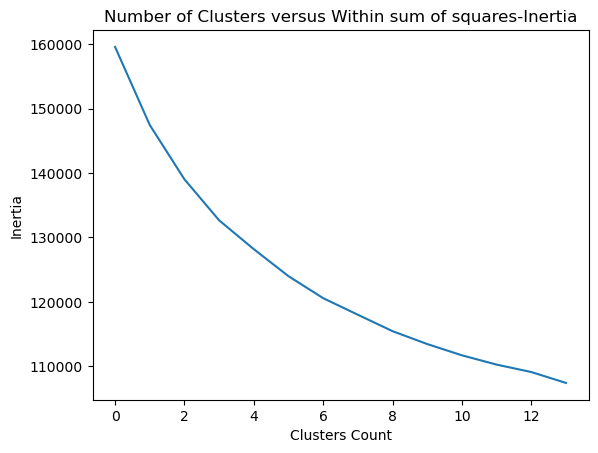

In [322]:
#Assuming the columns related to Customer Care will have overlapping behaviour. Hence, selecting such features for clustering
cluster = df_customer_churn_treated.drop(columns='Churn', axis=1)
wss2=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster)
    wss2.append(kmeans.inertia_)
plt.plot(wss2)
plt.title('Number of Clusters versus Within sum of squares-Inertia');
plt.xlabel('Clusters Count')
plt.ylabel('Inertia')

creating clusters for limited number of attributes also did not give an optimum number of cluster

In [229]:
cluster_labels=kmeans.labels_

In [230]:
df_customer_churn_treated['cluster']=cluster_labels
cluster_center= kmeans.cluster_centers_

In [231]:
df_customer_churn_treated.head(20)

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn,cluster
0,-0.557701,1.471157,-1.340479,-0.887768,-1.227678,0.134344,-0.685870,0.087077,-0.772983,-1.351326,0.260406,1.582612,-1.382086,-0.401377,0.099251,-0.203224,-0.430754,1,1
1,-0.865689,-0.714697,-1.114564,2.338139,0.814546,0.134344,0.180836,-0.823073,-0.048194,-1.351326,0.088538,1.582612,-0.317470,-0.909186,-1.253076,-0.421693,-0.430754,1,1
2,-0.865689,-0.714697,1.370505,-0.887768,0.814546,-1.243919,0.180836,-0.823073,-0.048194,-1.351326,0.002603,1.582612,-0.583624,-0.909186,-0.441680,-0.402885,-0.430754,1,1
3,-0.865689,1.471157,-0.323860,-0.887768,0.814546,-1.243919,0.180836,0.087077,1.401386,-1.351326,0.174472,-0.631867,1.811761,-0.909186,-0.441680,-0.347974,-0.430754,1,2
4,-0.865689,-0.714697,-0.662733,-0.081291,0.814546,-1.243919,-0.685870,-0.823073,1.401386,-1.351326,-0.255200,-0.631867,-1.382086,-0.401377,-0.441680,-0.372995,-0.430754,1,2
5,-0.865689,-0.714697,0.466844,-0.887768,-1.227678,0.134344,1.394223,-0.823073,1.401386,-1.351326,-0.341134,1.582612,1.545607,1.122051,0.640182,-0.319315,1.487396,1,1
6,-0.711695,1.471157,-0.775691,1.531662,0.814546,-1.243919,-0.685870,0.087077,-0.772983,-0.236189,-0.169266,-0.631867,-0.583624,-0.909186,-1.253076,-0.421917,-0.430754,1,4
7,-0.865689,-0.714697,-1.340479,-0.081291,0.814546,0.134344,-0.685870,-0.823073,-0.772983,-0.236189,-0.255200,1.582612,-0.051316,0.106433,-1.253076,-0.410330,-0.430754,1,1
8,0.135273,1.471157,-1.001606,0.725186,0.814546,-1.243919,0.180836,-0.823073,-0.048194,-0.236189,-0.341134,1.582612,-0.583624,-0.909186,-0.712145,-0.388500,-0.430754,1,1
9,-0.865689,-0.714697,1.483463,-0.887768,0.814546,-1.243919,1.047541,-0.823073,-0.048194,-1.351326,-0.341134,-0.631867,-1.115932,-0.401377,-0.982611,-0.410330,-0.430754,1,0


In [232]:
cl0 = df_customer_churn_treated.loc[df_customer_churn_treated['cluster']==0]

In [233]:
cluster_0_data = cl0[cl0['cluster'] == 0]
cluster_0_data[['cluster', 'Churn']].head(10)

,cluster,Churn
9,0,1
21,0,1
35,0,0
38,0,0
56,0,0
72,0,0
74,0,0
80,0,1
82,0,0
87,0,0


In [234]:
cl1 = df_customer_churn_treated.loc[df_customer_churn_treated['cluster']==1]

In [235]:
cluster_1_data = cl1[cl1['cluster'] == 1]
cluster_1_data[['cluster', 'Churn']].head(10)

,cluster,Churn
0,1,1
1,1,1
2,1,1
5,1,1
7,1,1
8,1,1
11,1,1
12,1,1
13,1,1
15,1,1


In [236]:
cl2 = df_customer_churn_treated.loc[df_customer_churn_treated['cluster']==2]

In [237]:
cluster_2_data = cl2[cl2['cluster'] == 2]
cluster_2_data[['cluster', 'Churn']].head(10)

,cluster,Churn
3,2,1
4,2,1
25,2,1
26,2,0
34,2,0
36,2,0
40,2,0
46,2,1
59,2,0
64,2,0


In [238]:
cl3 = df_customer_churn_treated.loc[df_customer_churn_treated['cluster']==3]

In [239]:
cluster_3_data = cl3[cl3['cluster'] == 3]
cluster_3_data[['cluster', 'Churn']].head(20)

,cluster,Churn
10,3,1
28,3,0
30,3,0
33,3,0
41,3,0
48,3,0
53,3,0
60,3,0
61,3,0
62,3,0


In [240]:
cl4 = df_customer_churn_treated.loc[df_customer_churn_treated['cluster']==4]

In [241]:
cluster_4_data = cl4[cl4['cluster'] == 4]
cluster_4_data[['cluster', 'Churn']].head(10)

,cluster,Churn
6,4,1
14,4,1
24,4,1
29,4,0
31,4,0
37,4,0
42,4,0
43,4,0
44,4,0
47,4,0


# Capstone Project module - Model Building

Performing PCA

In [242]:
df_cust_churn_scaled=df_customer_churn_treated.drop(columns='Churn', axis=0)

In [243]:
df_cust_churn_scaled.shape

(11260, 18)

In [244]:
#Apply PCA taking all components
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=42)
pca_transformed = pca.fit_transform(df_cust_churn_scaled)

In [245]:
#Extract Eigen vectors
pca.components_

array([[-3.05201456e-02, -1.66441418e-04,  3.79760641e-01,
         2.28091579e-02, -4.98776117e-02,  1.38602176e-01,
         5.29171861e-02, -1.17917278e-02,  1.48461185e-01,
         1.81783587e-02,  8.39292813e-03,  3.48136745e-01,
         4.87465932e-02, -3.49745744e-02, -1.18247280e-01,
        -7.86500768e-03, -1.79085114e-02, -8.17366028e-01],
       [ 1.60178088e-01,  1.35292626e-01,  9.61004769e-02,
         1.17432035e-02, -1.00435372e-01,  3.34257758e-01,
         1.84366532e-01,  4.19841338e-01,  5.32874651e-02,
         1.18491029e-01,  1.59212278e-02, -3.56929290e-02,
         9.82011993e-02,  5.53913621e-01,  5.18716345e-01,
         1.01675930e-01, -1.36974311e-02,  1.13673524e-02],
       [ 1.10413091e-02,  5.41739129e-01,  2.81188419e-02,
         3.73488270e-01, -1.00163399e-01, -4.54036393e-01,
        -2.33177638e-01,  3.93673388e-01,  6.26610841e-02,
        -1.17664461e-02, -1.07757239e-02,  1.13695995e-01,
        -3.32618013e-01, -9.02246028e-02,  4.11740916e

In [246]:
print('Explained variance:\n',pca.explained_variance_)
print('Explained variance Ratio:\n',pca.explained_variance_ratio_)

Explained variance:
 [2.42810663 1.66497336 1.23466813 1.11363669 1.0666635  1.05583598
 0.99039561 0.97721379 0.92840018 0.88564592 0.84571806 0.70851202
 0.60165459 0.53175852 0.45264805 0.31448018 0.06788657]
Explained variance Ratio:
 [0.15261932 0.10465236 0.07760541 0.06999794 0.06704543 0.06636486
 0.06225159 0.06142304 0.05835485 0.05566752 0.05315784 0.04453372
 0.03781717 0.03342383 0.02845132 0.01976674 0.00426703]


In [247]:
pca = PCA(n_components=17, random_state=42)
pca_transformed = pca.fit_transform(df_cust_churn_scaled)

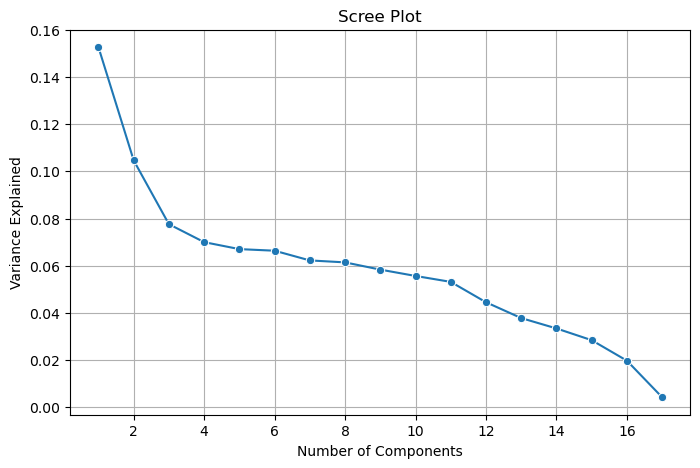

In [248]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

Only 1 PCA can be dropped based on the above plot. Hence, PCA might not be helpful with the provided dataset. 

In [249]:
#scaled and treated data
df_customer_churn_treated

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn,cluster
0,-0.557701,1.471157,-1.340479,-0.887768,-1.227678,0.134344,-0.685870,0.087077,-0.772983,-1.351326,0.260406,1.582612,-1.382086,-0.401377,0.099251,-0.203224,-0.430754,1,1
1,-0.865689,-0.714697,-1.114564,2.338139,0.814546,0.134344,0.180836,-0.823073,-0.048194,-1.351326,0.088538,1.582612,-0.317470,-0.909186,-1.253076,-0.421693,-0.430754,1,1
2,-0.865689,-0.714697,1.370505,-0.887768,0.814546,-1.243919,0.180836,-0.823073,-0.048194,-1.351326,0.002603,1.582612,-0.583624,-0.909186,-0.441680,-0.402885,-0.430754,1,1
3,-0.865689,1.471157,-0.323860,-0.887768,0.814546,-1.243919,0.180836,0.087077,1.401386,-1.351326,0.174472,-0.631867,1.811761,-0.909186,-0.441680,-0.347974,-0.430754,1,2
4,-0.865689,-0.714697,-0.662733,-0.081291,0.814546,-1.243919,-0.685870,-0.823073,1.401386,-1.351326,-0.255200,-0.631867,-1.382086,-0.401377,-0.441680,-0.372995,-0.430754,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,-0.095718,-0.714697,1.822336,-0.081291,0.814546,0.134344,-1.552575,0.087077,-1.497773,0.878948,0.260406,-0.631867,0.747146,-0.401377,-0.171215,-0.238040,1.487396,0,0
11256,0.135273,-0.714697,0.127971,-0.081291,0.814546,0.134344,1.047541,1.907376,1.401386,0.878948,0.088538,-0.631867,-0.051316,-0.401377,0.910647,0.171695,-0.430754,0,3
11257,-0.788692,-0.714697,-0.436818,-0.887768,0.814546,0.134344,-1.552575,0.087077,0.676596,0.878948,0.088538,1.582612,1.545607,-0.401377,-0.171215,-0.026959,-0.430754,0,1
11258,0.905243,1.471157,-0.775691,-0.081291,0.814546,1.512607,1.047541,0.087077,0.676596,0.878948,0.088538,-0.631867,-0.051316,0.106433,1.181112,-0.091442,1.487396,0,3


In [250]:
df_customer_churn_treated.drop(columns='cluster', axis=1, inplace = True)

VIF

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [252]:
vif_data = pd.DataFrame()
vif_data["Feature"] = df_customer_churn_treated.columns
vif_data["VIF"] = [variance_inflation_factor(df_customer_churn_treated.values, i) for i in range(len(df_customer_churn_treated.columns))]
vif_data.sort_values('VIF', ascending=False)

,Feature,VIF
15,cashback,1.605351
0,Tenure,1.323856
14,Day_Since_CC_connect,1.298326
17,Churn,1.298149
13,coupon_used_for_payment,1.228979
7,account_segment,1.224701
5,Service_Score,1.171240
6,Account_user_count,1.159163
10,rev_per_month,1.134649
11,Complain_ly,1.071332


the VIF values for all the attributes are less, indicating the multicollinearity is not high and all the attributes are independent of each other. 

In [253]:
#split the data into train and test in the 70:30 ratio
from sklearn.model_selection import train_test_split

In [254]:
Train, Test = train_test_split(df_customer_churn_treated, test_size=0.3, stratify=y)

List of models to be built:
    1. Linear Regression
    2. Logistic Regression
    3. LDA
    4. Decision Tree
    5. Random Forrest
    6. Naive Bayes
    7. KNN    

In [255]:
#trying the statsmodel first as this gives an option to set the threshold value for custom classifications(Churn = 0 or 1)
import statsmodels.formula.api as SM

In [256]:
model_Logit1=SM.logit('Churn~cashback + Tenure + Day_Since_CC_connect + coupon_used_for_payment + account_segment + Service_Score + Account_user_count + rev_per_month + Complain_ly + City_Tier + Marital_Status + Payment + CC_Contacted_LY + CC_Agent_Score + rev_growth_yoy + Gender + Login_device', data = Train).fit()
model_Logit1.summary()

Optimization terminated successfully.
         Current function value: 0.314733
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7864
Method:                           MLE   Df Model:                           17
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.3056
Time:                        21:01:04   Log-Likelihood:                -2480.7
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.5044      0.062    -40.335      0.000      -2.626      -2.383
cashback                   -0.1610      0.229     -0.702      0.483      -0.610       0.288
Tenure                     -1.9858      0.090    -22.025      0.000      -2.163      -1.809
Day_Since_CC_connect       -0.3903      0.050     -7.820      0.000      -0.488      -0.292
coupon_used_for_payment     0.2583      0.044      5.852      0.000       0.172       0.345
account_segment            -0.1153      0.052     -2.238      0.025      -0.216      -0.014
Service_Score              -0.0412      0.040     -1.019      0.308      -0.120       0.038
Account_user_count          0.4306      0.048      8.885      0.000       0.336       0.526
rev_per_month               1.3568      0.139      9.781      0.000       1.085       1.629
Complain_ly                 0.7109      0.034     20.648      0.000       0.643       0.778
City_Tier                   0.2283      0.037      6.243      0.000       0.157       0.300
Marital_Status             -0.4338      0.036    -12.076      0.000      -0.504      -0.363
Payment                     0.0943      0.036      2.637      0.008       0.024       0.164
CC_Contacted_LY             0.2333      0.038      6.196      0.000       0.159       0.307
CC_Agent_Score              0.3850      0.038     10.185      0.000       0.311       0.459
rev_growth_yoy             -0.1119      0.038     -2.938      0.003      -0.186      -0.037
Gender                      0.1213      0.037      3.292      0.001       0.049       0.193
Login_device                0.1849      0.037      5.017      0.000       0.113       0.257
===========================================================================================
"""

The above model has attributes: cashback, account_segment, Payment wih p value > 0.05. Hence, discarding them from the next iteration

In [257]:
model_Logit2=SM.logit('Churn~Tenure + Day_Since_CC_connect + coupon_used_for_payment + Service_Score + Account_user_count + rev_per_month + Complain_ly + City_Tier + Marital_Status + CC_Contacted_LY + CC_Agent_Score + rev_growth_yoy + Gender + Login_device', data = Train).fit()
model_Logit2.summary()

Optimization terminated successfully.
         Current function value: 0.315762
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7867
Method:                           MLE   Df Model:                           14
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.3034
Time:                        21:01:06   Log-Likelihood:                -2488.8
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.5043      0.058    -42.978      0.000      -2.618      -2.390
Tenure                     -2.0638      0.086    -23.868      0.000      -2.233      -1.894
Day_Since_CC_connect       -0.4220      0.048     -8.779      0.000      -0.516      -0.328
coupon_used_for_payment     0.2435      0.043      5.635      0.000       0.159       0.328
Service_Score              -0.0492      0.040     -1.237      0.216      -0.127       0.029
Account_user_count          0.4363      0.048      9.055      0.000       0.342       0.531
rev_per_month               1.3105      0.137      9.568      0.000       1.042       1.579
Complain_ly                 0.7101      0.034     20.694      0.000       0.643       0.777
City_Tier                   0.2139      0.035      6.137      0.000       0.146       0.282
Marital_Status             -0.4313      0.036    -12.096      0.000      -0.501      -0.361
CC_Contacted_LY             0.2220      0.037      5.956      0.000       0.149       0.295
CC_Agent_Score              0.3908      0.038     10.379      0.000       0.317       0.465
rev_growth_yoy             -0.1072      0.038     -2.833      0.005      -0.181      -0.033
Gender                      0.1238      0.037      3.373      0.001       0.052       0.196
Login_device                0.1847      0.037      5.027      0.000       0.113       0.257
===========================================================================================
"""

In [258]:
y_prob_pred_train = model_Logit2.predict(Train)

Choosing optimal threshold to identify 0 and 1 from the probability values calculated in the logistic regresssion model: model_Logit2 above

In [259]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(Train['Churn'],y_prob_pred_train)

In [260]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [261]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.22866893654093431

In [262]:
y_class_pred_train=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.246:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

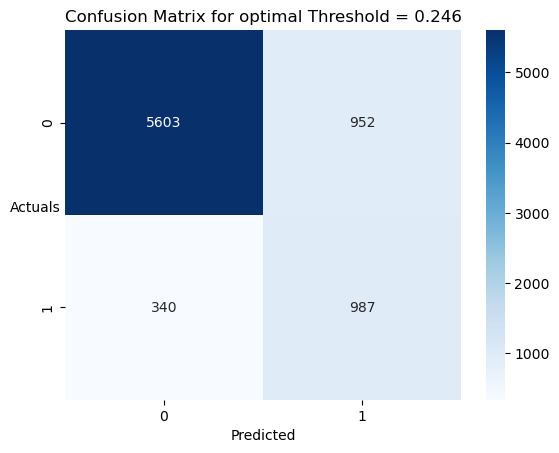

In [263]:
#Confusion matric for Train data
sns.heatmap((metrics.confusion_matrix(Train['Churn'],y_class_pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix for optimal Threshold = 0.246');

In [264]:
X_Train = Train.drop(columns='Churn', axis=1)
X_Test = Test.drop(columns='Churn', axis=1)
y_Train = Train['Churn']
y_Test = Test['Churn']

In [265]:
y_prob_pred_test = model_Logit2.predict(Test)

In [266]:
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.246:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

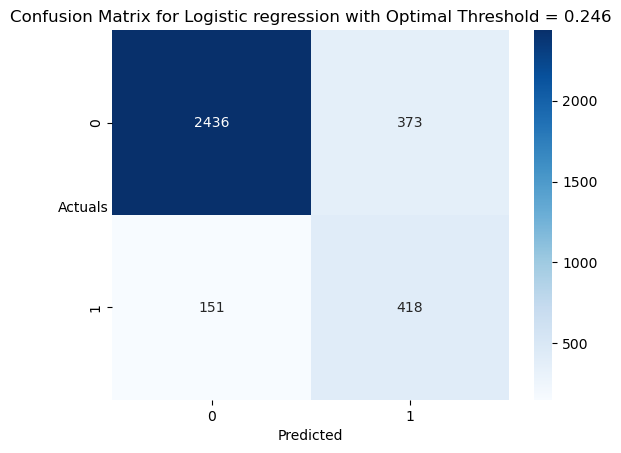

In [267]:
#Confusion matric for Test data - Logistic Regression
sns.heatmap((metrics.confusion_matrix(y_Test,y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix for Logistic regression with Optimal Threshold = 0.246');

In [268]:
print(classification_report(y_Test,y_class_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2809
           1       0.53      0.73      0.61       569

    accuracy                           0.84      3378
   macro avg       0.74      0.80      0.76      3378
weighted avg       0.87      0.84      0.85      3378



For the current business problem, most important expectations are to have high precision for churn prediction=0 and high accuracy. In the above model, the precision is 95%. While this is good, we need to work to get precision for churn prediction = 0 to be even higher. 

Linear Regression

In [269]:
model_Linear1=SM.ols('Churn~cashback + Tenure + Day_Since_CC_connect + coupon_used_for_payment + account_segment + Service_Score + Account_user_count + rev_per_month + Complain_ly + City_Tier + Marital_Status + Payment + CC_Contacted_LY + CC_Agent_Score + rev_growth_yoy + Gender + Login_device', data = Train).fit()
model_Linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     142.0
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:01:21   Log-Likelihood:                -2381.2
No. Observations:                7882   AIC:                             4798.
Df Residuals:                    7864   BIC:                             4924.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1727      0.004     41.623      0.000       0.165       0.181
cashback                    0.0032      0.018      0.181      0.856      -0.032       0.038
Tenure                     -0.1548      0.006    -26.296      0.000      -0.166      -0.143
Day_Since_CC_connect       -0.0359      0.004     -8.332      0.000      -0.044      -0.027
coupon_used_for_payment     0.0166      0.004      4.019      0.000       0.009       0.025
account_segment            -0.0194      0.004     -4.698      0.000      -0.027      -0.011
Service_Score              -0.0054      0.004     -1.333      0.182      -0.013       0.003
Account_user_count          0.0440      0.005      9.433      0.000       0.035       0.053
rev_per_month               0.1285      0.014      9.018      0.000       0.101       0.156
Complain_ly                 0.0884      0.004     23.656      0.000       0.081       0.096
City_Tier                   0.0249      0.004      6.575      0.000       0.017       0.032
Marital_Status             -0.0516      0.004    -13.745      0.000      -0.059      -0.044
Payment                     0.0138      0.004      3.695      0.000       0.006       0.021
CC_Contacted_LY             0.0246      0.004      6.363      0.000       0.017       0.032
CC_Agent_Score              0.0415      0.004     11.130      0.000       0.034       0.049
rev_growth_yoy             -0.0071      0.004     -1.896      0.058      -0.014       0.000
Gender                      0.0115      0.004      3.090      0.002       0.004       0.019
Login_device                0.0174      0.004      4.585      0.000       0.010       0.025
==============================================================================
Omnibus:                     1401.326   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2266.062
Skew:                           1.242   Prob(JB):                         0.00
Kurtosis:                       3.853   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above, the P values higher than 0.05 are for attributes: cashback and rev_growth_yoy. But in the case of rev_growth_yoy, the value 0.059 is not so insignificant. Hence, choosing to continue this column for next iteration of model building 

In [270]:
model_Linear2=SM.ols('Churn ~ Tenure + Day_Since_CC_connect + coupon_used_for_payment + account_segment + Service_Score + Account_user_count + rev_per_month + Complain_ly + City_Tier + Marital_Status + Payment + CC_Contacted_LY + CC_Agent_Score + rev_growth_yoy + Gender + Login_device', data = Train).fit()
model_Linear2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     150.9
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:01:22   Log-Likelihood:                -2381.2
No. Observations:                7882   AIC:                             4796.
Df Residuals:                    7865   BIC:                             4915.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1724      0.004     44.374      0.000       0.165       0.180
Tenure                     -0.1544      0.006    -28.037      0.000      -0.165      -0.144
Day_Since_CC_connect       -0.0358      0.004     -8.461      0.000      -0.044      -0.027
coupon_used_for_payment     0.0167      0.004      4.067      0.000       0.009       0.025
account_segment            -0.0192      0.004     -4.857      0.000      -0.027      -0.011
Service_Score              -0.0053      0.004     -1.323      0.186      -0.013       0.003
Account_user_count          0.0441      0.005      9.477      0.000       0.035       0.053
rev_per_month               0.1288      0.014      9.091      0.000       0.101       0.157
Complain_ly                 0.0884      0.004     23.663      0.000       0.081       0.096
City_Tier                   0.0249      0.004      6.586      0.000       0.018       0.032
Marital_Status             -0.0516      0.004    -13.747      0.000      -0.059      -0.044
Payment                     0.0138      0.004      3.693      0.000       0.006       0.021
CC_Contacted_LY             0.0245      0.004      6.361      0.000       0.017       0.032
CC_Agent_Score              0.0415      0.004     11.130      0.000       0.034       0.049
rev_growth_yoy             -0.0071      0.004     -1.898      0.058      -0.015       0.000
Gender                      0.0115      0.004      3.093      0.002       0.004       0.019
Login_device                0.0173      0.004      4.582      0.000       0.010       0.025
==============================================================================
Omnibus:                     1400.685   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2264.490
Skew:                           1.242   Prob(JB):                         0.00
Kurtosis:                       3.852   Cond. No.                         4.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
y_prob_pred_lnr_train=model_Linear2.predict(Train)

Choosing optimal threshold to identify 0 and 1 from the probability values calculated in the Linear regresssion model: model_Linear2 above

In [272]:
fpr_lnr, tpr_lnr, thresholds_lnr = roc_curve(Train['Churn'],y_prob_pred_lnr_train)

In [273]:
optimal_lnr_idx = np.argmax(tpr_lnr-fpr_lnr)
optimal_lnr_threshold = thresholds[optimal_lnr_idx]
optimal_lnr_threshold

0.1962242602552645

In [274]:
y_prob_pred_lnr_test=model_Linear2.predict(Test)

In [275]:
y_class_pred_lnr_test=[]
for i in range(0,len(y_prob_pred_lnr_test)):
    if np.array(y_prob_pred_lnr_test)[i]>0.27:
        a=1
    else:
        a=0
    y_class_pred_lnr_test.append(a)

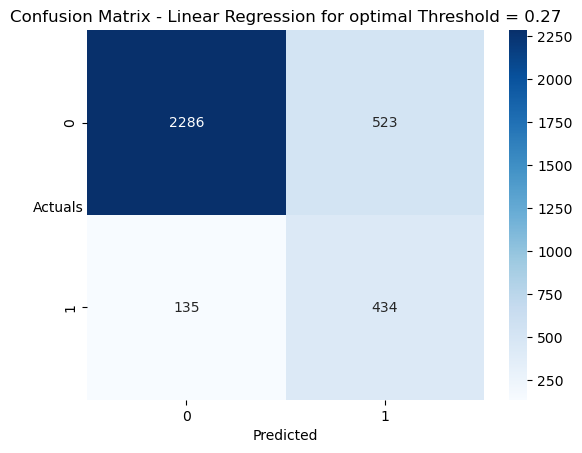

In [276]:
#Confusion matric for Test data  - Linear Regression
sns.heatmap((metrics.confusion_matrix(y_Test,y_class_pred_lnr_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix - Linear Regression for optimal Threshold = 0.27');

In [277]:
print(classification_report(y_Test,y_class_pred_lnr_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2809
           1       0.45      0.76      0.57       569

    accuracy                           0.81      3378
   macro avg       0.70      0.79      0.72      3378
weighted avg       0.86      0.81      0.82      3378



For churn prediction=0 the precision as shown above is 96%, which is higher than the logistic regression model. But it is also poor in precision for churn =1. 

For below models, sklearn library is used

In [278]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [279]:
#additional parameter custom weight to be used in Random Forest model
custom_weights = {0:1, 1:10}

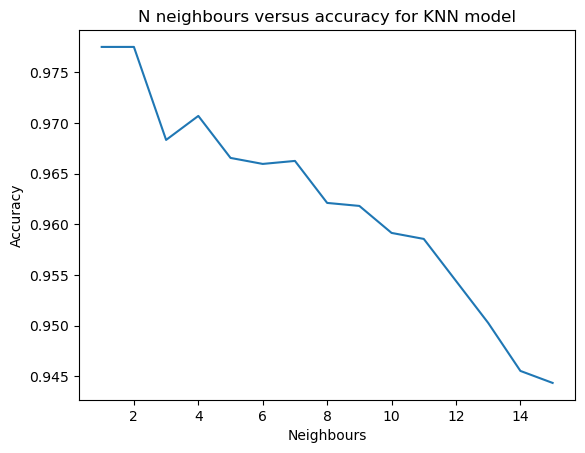

In [280]:
#calculate optimum n_neighbours to be used in KNN model
scores=[]
for i in range (1,16):
    Nhbr = KNeighborsClassifier(n_neighbors=i, weights='distance')
    Nhbr = Nhbr.fit(X_Train, y_Train)
    scores.append(Nhbr.score(X_Test, y_Test))
plt.plot(range(1,16), scores)    
plt.title('N neighbours versus accuracy for KNN model');
plt.xlabel('Neighbours');
plt.ylabel('Accuracy');

In [281]:
#Building dictionary of models. Also including hyperparemeter tuning based on the parameters identified by iteratively building models separately.
models = {
#removing Linear regression as it is creating issue in the loop
#   'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(min_samples_split=10, max_depth=15,  criterion='gini', splitter='best'),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=14,min_samples_leaf=5,class_weight={0:1, 1:10}, criterion='entropy', random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=2, weights='distance')
}

In [282]:
# Function to plot the ROC curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')   

In [283]:
#Corrective step to eliminae error on KNN model
X_Train = np.ascontiguousarray(X_Train)
X_Test = np.ascontiguousarray(X_Test)

In [300]:
X_Test.shape

(3378, 17)

Logistic Regression Train data accuracy: 0.879
Logistic Regression Test data accuracy: 0.883
Confusion Matrix for Train data:
 [[6365  190]
 [ 763  564]]
Classification Matrix for Train data:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.75      0.43      0.54      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.70      0.74      7882
weighted avg       0.87      0.88      0.86      7882

Confusion Matrix for Test data:
 [[2731   78]
 [ 318  251]]
Classification Matrix for Test data:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.76      0.44      0.56       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378

------------------------------
------------------------

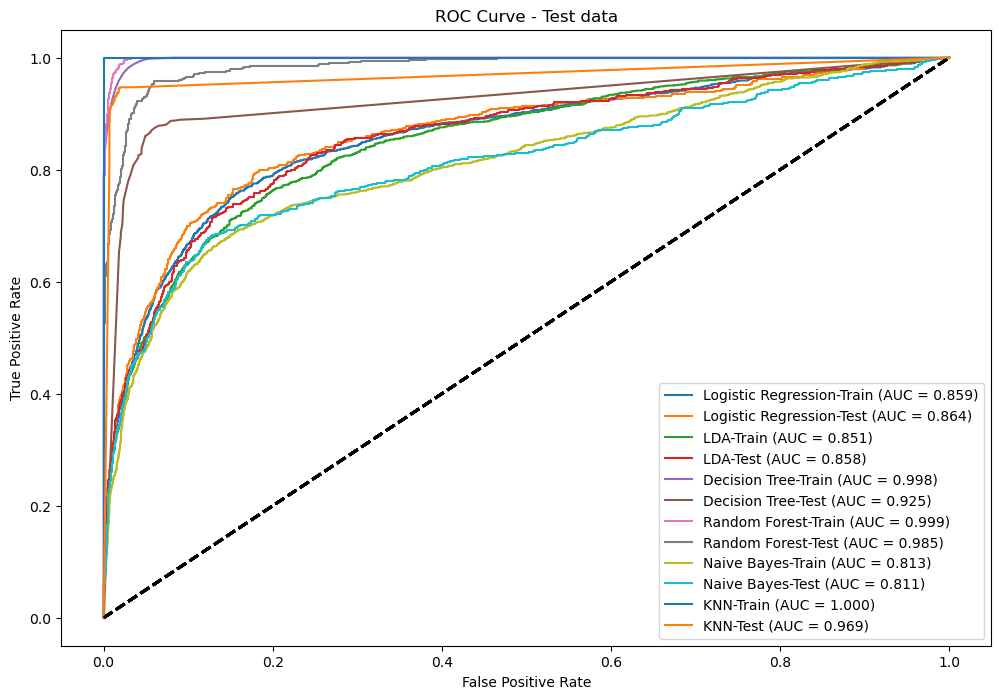

In [284]:
#Loop through models
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    # Train the model
    model.fit(X_Train, y_Train)
    
    # Make predictions
    y_pred_Train = model.predict(X_Train)
    y_pred_Test=model.predict(X_Test)
    
    #calculating probabilities for ROC curve
    y_pred_train_proba = model.predict_proba(X_Train)[:, 1]
    y_pred_test_proba = model.predict_proba(X_Test)[:,1]
    
    accuracy_train = accuracy_score(y_Train, y_pred_Train)
    accuracy_test = accuracy_score(y_Test, y_pred_Test)
    
    print(f"{model_name} Train data accuracy: {accuracy_train:.3f}")
    print(f"{model_name} Test data accuracy: {accuracy_test:.3f}")
    
    #printing confusion matrix
    print('Confusion Matrix for Train data:\n',confusion_matrix(y_Train, y_pred_Train))
    print('Classification Matrix for Train data:\n',classification_report(y_Train, y_pred_Train))

    print('Confusion Matrix for Test data:\n',confusion_matrix(y_Test, y_pred_Test))
    print('Classification Matrix for Test data:\n',classification_report(y_Test, y_pred_Test))
    
    # Plot ROC curve for train data
    plot_roc_curve(y_Train, y_pred_train_proba, model_name + '-Train')
    print('-' * 30)

    # Finalize and show ROC curve plot for train data
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Train data')
    plt.legend(loc='lower right')

          
    # Plot ROC curve for test data
    plot_roc_curve(y_Test, y_pred_test_proba, model_name + '-Test')
    print('-' * 60)

    # Finalize and show ROC curve plot for test data
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Test data')
    plt.legend(loc='lower right')
     
plt.show() 

The comparision of the models shows that KNN and Random Forest have the best performance and application ensemble techniques on the rest of the models may not enhance their performance to match the KNN and Random Forest models performance if the same ensemble techniques are used on them. 

In [285]:
#Not performing hyperparameter tuning for KNN as it already is tuned separately(in the above cells)
param_grid = {
    'Logistic Regression': {
        'penalty':['l1', 'l2', 'elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100]
    }, 
    'LDA': {
        'solver':['lsqr','eigen']
    },
    'Decision Tree': {
        'max_depth': range(2,10),
        'criterion': ['gini', 'entropy'],
        'min_samples_split': range(15,25,5)
    }, 
    'Random Forest': {
        'max_depth': range(14,17,2),
        'n_estimators': [220],
        'min_samples_leaf': range(5,16,5),
        'criterion': ['gini','entropy'],
        'max_features': range(10,13),
        'min_samples_split': range(10,16,5)
    }
}

Logistic Regression Accuracy: 0.883
[[2731   78]
 [ 318  251]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.76      0.44      0.56       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378

------------------------------------------------------------
LDA Accuracy: 0.881
[[2734   75]
 [ 327  242]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.76      0.43      0.55       569

    accuracy                           0.88      3378
   macro avg       0.83      0.70      0.74      3378
weighted avg       0.87      0.88      0.87      3378

------------------------------------------------------------
Decision Tree Accuracy: 0.918
[[2713   96]
 [ 180  389]]
              precision    recall  f1-score   support

  

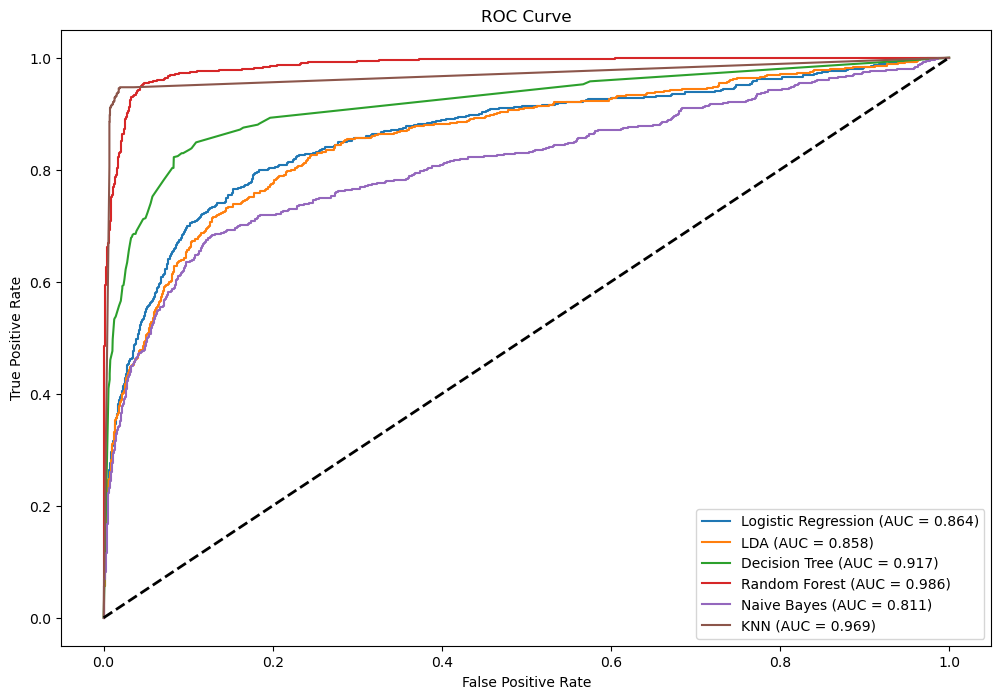

In [286]:
plt.figure(figsize=(12, 8))
tuned_models = {}
for model_name, model in models.items():
    if model_name in param_grid:
        # Train the model
        grid_search = GridSearchCV(model,param_grid[model_name],cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_Train, y_Train)
        best_model = grid_search.best_estimator_
        tuned_models[model_name] = best_model
    else: 
        model.fit(X_Train, y_Train)
        tuned_models[model_name]=model
    
    # Make predictions
    y_pred = tuned_models[model_name].predict(X_Test)
    
    #calculate accuracy of the model
    accuracy = accuracy_score(y_Test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.3f}")
    
    #printing confusion matrix
    print(confusion_matrix(y_Test, y_pred))
    print(classification_report(y_Test, y_pred))
    
    #calculating probabilities for ROC curve
    y_pred_proba = tuned_models[model_name].predict_proba(X_Test)[:, 1]
    # Plot ROC curve
    plot_roc_curve(y_Test, y_pred_proba, model_name)
    
    print('-' * 60)

# Finalize and show ROC curve plot
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show() 

In [167]:
#tuned_models

{'Logistic Regression': LogisticRegression(C=0.1, max_iter=1000),
 'LDA': LinearDiscriminantAnalysis(solver='lsqr'),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=20),
 'Random Forest': RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=9,
                        min_samples_leaf=10, n_estimators=200, random_state=42),
 'Naive Bayes': GaussianNB(),
 'KNN': KNeighborsClassifier(n_neighbors=2, weights='distance')}

In [287]:
tuned_models

{'Logistic Regression': LogisticRegression(C=1, max_iter=1000),
 'LDA': LinearDiscriminantAnalysis(solver='lsqr'),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=20),
 'Random Forest': RandomForestClassifier(class_weight={0: 1, 1: 10}, criterion='entropy',
                        max_depth=16, max_features=11, min_samples_leaf=5,
                        min_samples_split=10, n_estimators=220, random_state=42),
 'Naive Bayes': GaussianNB(),
 'KNN': KNeighborsClassifier(n_neighbors=2, weights='distance')}

Except Decision Tree, hyperparameter tuning has not helped the other models that have been built

Ensemble modeling

In [143]:
from xgboost import XGBClassifier

In [288]:
# VotingClassifier for Ensemble Modeling with all the models
ensemble_model1 = VotingClassifier(estimators=[
    ('lr', tuned_models['Logistic Regression']),
    ('lda', tuned_models['LDA']),
    ('dt', tuned_models['Decision Tree']),
    ('rf', tuned_models['Random Forest']),
    ('knn', tuned_models['KNN'])
], voting='soft')

In [289]:
#Training ensemble model
ensemble_model1.fit(X_Train, y_Train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1, max_iter=1000)),
                             ('lda', LinearDiscriminantAnalysis(solver='lsqr')),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9,
                                                     min_samples_split=20)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 10},
                                                     criterion='entropy',
                                                     max_depth=16,
                                                     max_features=11,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10,
                                                     n_estimators=220,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=2,
                                                   weights='distance'))],
                 voting='soft')

In [290]:
from sklearn.inspection import permutation_importance

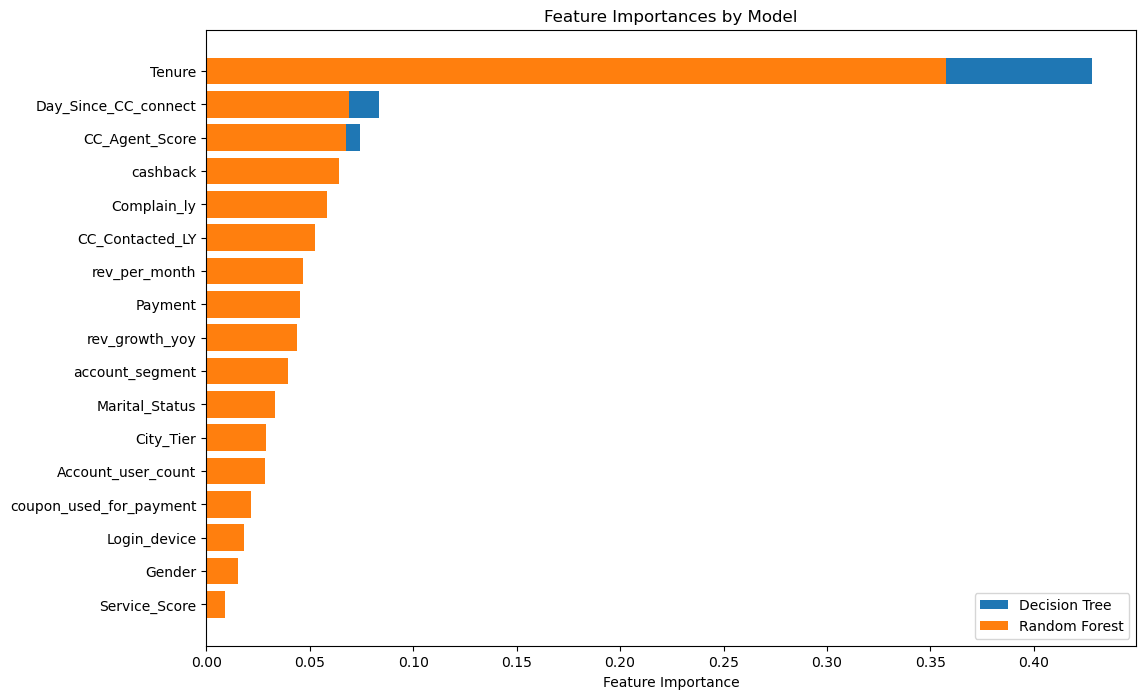

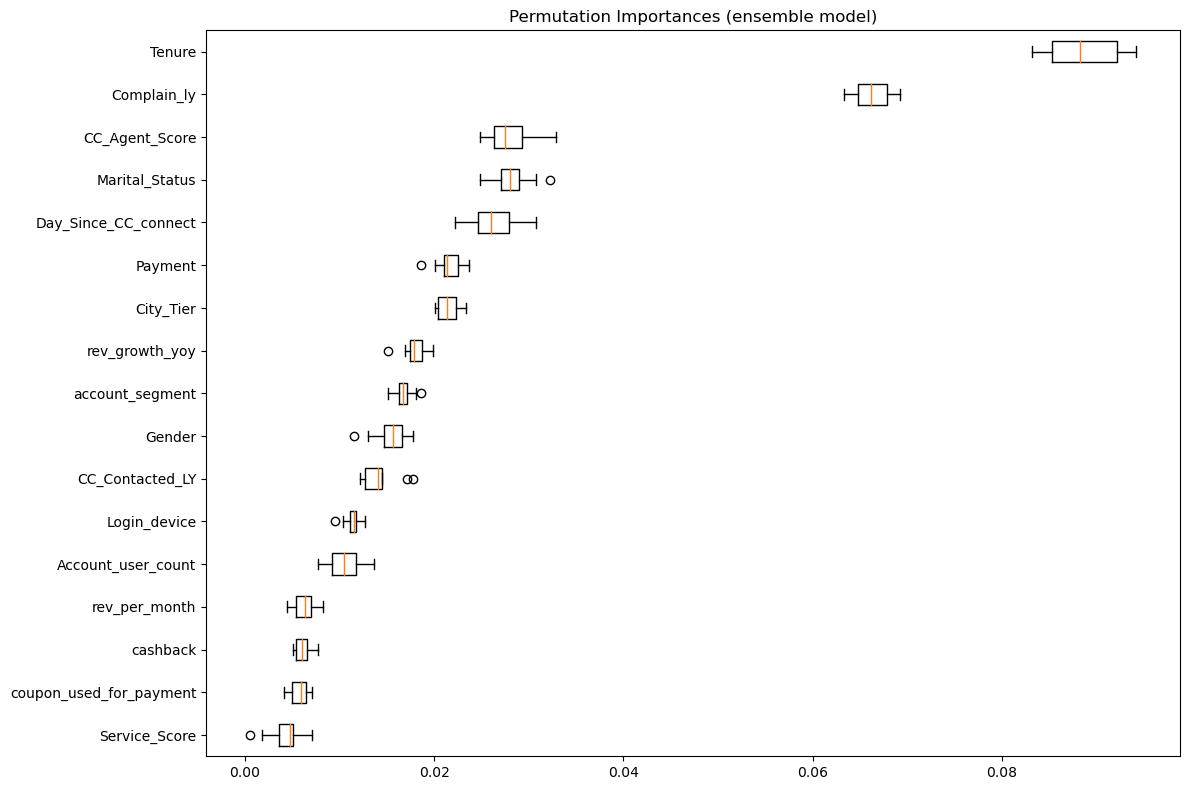

In [291]:
# Feature importance for individual models supporting feature_importances_
feature_importances = {}
for model_name, model in tuned_models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances[model_name] = model.feature_importances_

# Aggregate feature importances for plotting
features = X.columns
fig, ax = plt.subplots(figsize=(12, 8))
for model_name, importances in feature_importances.items():
    indices = np.argsort(importances)
    ax.barh(range(len(indices)), importances[indices], align='center', label=model_name)
    ax.set_yticks(range(len(indices)))
    ax.set_yticklabels(features[indices])
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importances by Model')
ax.legend()
plt.show()

# Permutation importance for the ensemble model
result = permutation_importance(ensemble_model1, X_Test, y_Test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=features[sorted_idx])
ax.set_title("Permutation Importances (ensemble model)")
fig.tight_layout()
plt.show()

In [292]:
#Making predictions using ensemble model built above
y_pred_ensemble = ensemble_model1.predict(X_Test)
accuracy_ensemble = accuracy_score(y_Test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.3f}")
print(confusion_matrix(y_Test, y_pred_ensemble))
print(classification_report(y_Test, y_pred_ensemble))

Ensemble Model Accuracy: 0.954
[[2782   27]
 [ 127  442]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2809
           1       0.94      0.78      0.85       569

    accuracy                           0.95      3378
   macro avg       0.95      0.88      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [293]:
# VotingClassifier for Ensemble Modeling with the best models - decision tree, random forest and KNN only
ensemble_model2 = VotingClassifier(estimators=[
    ('dt', tuned_models['Decision Tree']),
    ('rf', tuned_models['Random Forest']),
    ('knn', tuned_models['KNN'])
], voting='soft')

In [294]:
#Training ensemble model
ensemble_model2.fit(X_Train, y_Train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9,
                                                     min_samples_split=20)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 10},
                                                     criterion='entropy',
                                                     max_depth=16,
                                                     max_features=11,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10,
                                                     n_estimators=220,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=2,
                                                   weights='distance'))],
                 voting='soft')

In [295]:
#Making predictions using ensemble model , but only for Random Forest, KNN and Decision Tree
y_pred_ensemble = ensemble_model2.predict(X_Test)
accuracy_ensemble = accuracy_score(y_Test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.3f}")
print(confusion_matrix(y_Test, y_pred_ensemble))
print(classification_report(y_Test, y_pred_ensemble))

Ensemble Model Accuracy: 0.972
[[2773   36]
 [  59  510]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2809
           1       0.93      0.90      0.91       569

    accuracy                           0.97      3378
   macro avg       0.96      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378



In [296]:
# VotingClassifier for Ensemble Modeling with only KNN and Random Forest
ensemble_model3 = VotingClassifier(estimators=[
    ('rf', tuned_models['Random Forest']),
    ('knn', tuned_models['KNN'])
], voting='soft')

In [297]:
#Training ensemble model
ensemble_model3.fit(X_Train, y_Train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 10},
                                                     criterion='entropy',
                                                     max_depth=16,
                                                     max_features=11,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10,
                                                     n_estimators=220,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=2,
                                                   weights='distance'))],
                 voting='soft')

In [298]:
#Making predictions using ensemble model , but only for Random Forest, KNN. 
y_pred_ensemble = ensemble_model3.predict(X_Test)
accuracy_ensemble = accuracy_score(y_Test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.3f}")
print(confusion_matrix(y_Test, y_pred_ensemble))
print(classification_report(y_Test, y_pred_ensemble))

Ensemble Model Accuracy: 0.981
[[2784   25]
 [  39  530]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2809
           1       0.95      0.93      0.94       569

    accuracy                           0.98      3378
   macro avg       0.97      0.96      0.97      3378
weighted avg       0.98      0.98      0.98      3378



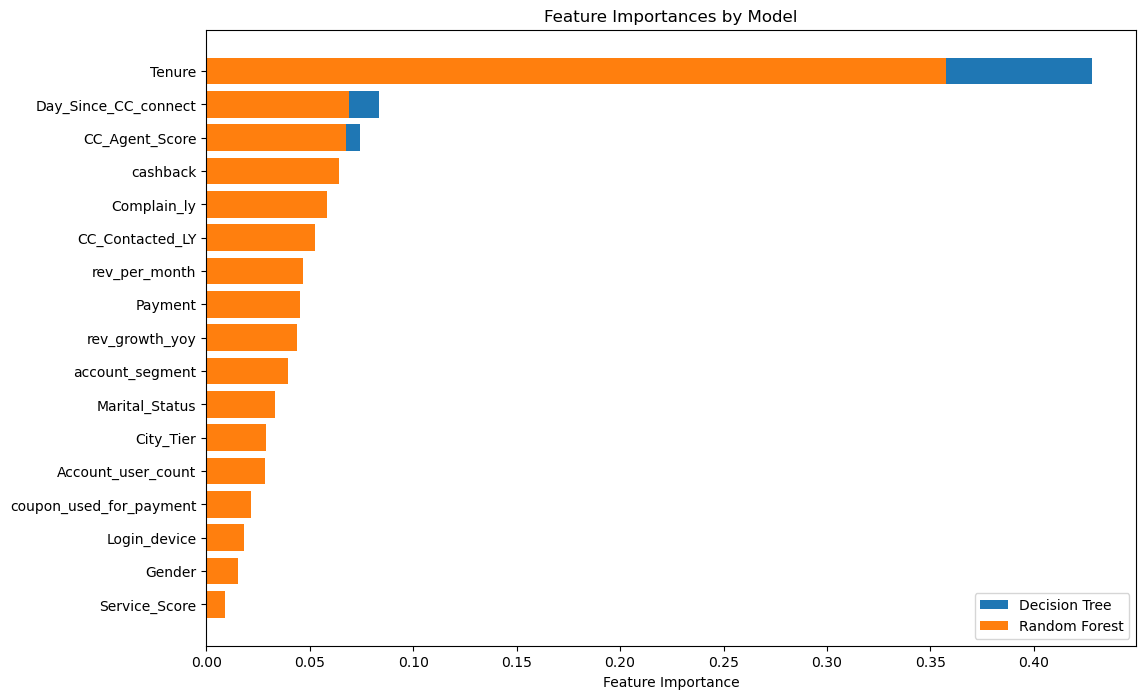

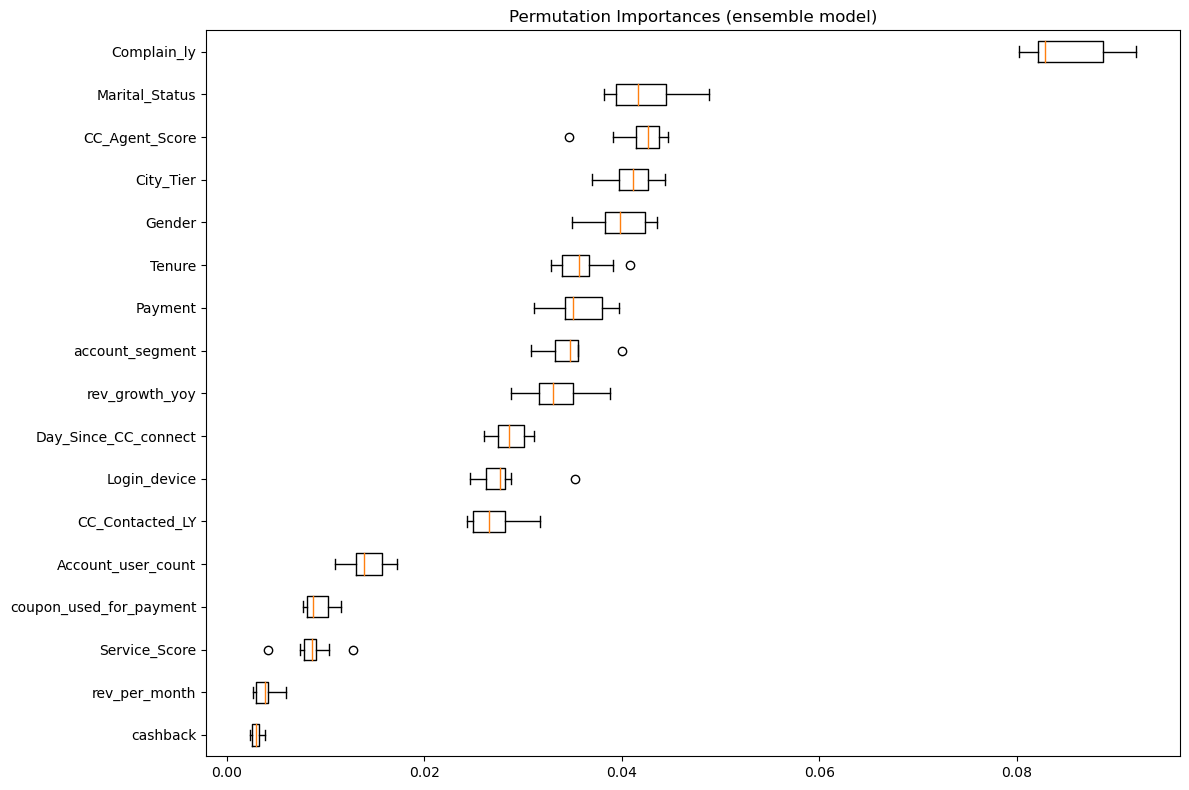

In [299]:
# Feature importance for individual models supporting feature_importances_
feature_importances = {}
for model_name, model in tuned_models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances[model_name] = model.feature_importances_

# Aggregate feature importances for plotting
features = X.columns
fig, ax = plt.subplots(figsize=(12, 8))
for model_name, importances in feature_importances.items():
    indices = np.argsort(importances)
    ax.barh(range(len(indices)), importances[indices], align='center', label=model_name)
    ax.set_yticks(range(len(indices)))
    ax.set_yticklabels(features[indices])
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importances by Model')
ax.legend()
plt.show()

# Permutation importance for the ensemble model
result = permutation_importance(ensemble_model3, X_Test, y_Test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=features[sorted_idx])
ax.set_title("Permutation Importances (ensemble model)")
fig.tight_layout()
plt.show()

importances[indices]: [0.42805823 0.02975952 0.04367371 0.05413373 0.00416751 0.00406703
 0.02714981 0.03550622 0.04114045 0.04502123 0.0369056  0.07427684
 0.04366329 0.0167934  0.08344866 0.0209894  0.01124536]
17 range(0, 17)
importances[indices]: [0.35760962 0.02885166 0.0527146  0.04515737 0.01547288 0.00926521
 0.0285449  0.03933432 0.06754752 0.0333584  0.04685801 0.0582583
 0.04381171 0.02184118 0.06889823 0.06415281 0.01832328]
17 range(0, 17)


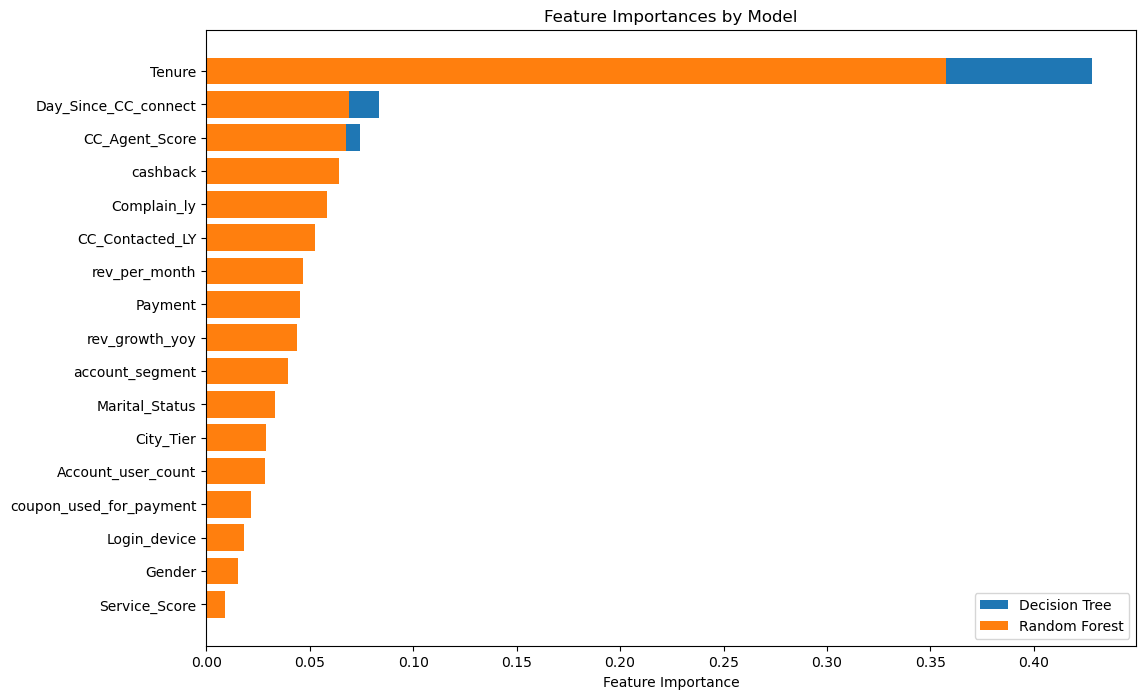

{'importances_mean': array([0.08863233, 0.0214032 , 0.01420959, 0.02149201, 0.01539372,
       0.00417407, 0.01044997, 0.01675548, 0.02830077, 0.02827117,
       0.00630551, 0.06640024, 0.0178508 , 0.00574304, 0.02628774,
       0.00615749, 0.01136767]), 'importances_std': array([0.00375204, 0.00111593, 0.00182967, 0.00138978, 0.00183922,
       0.00176357, 0.00172641, 0.00103569, 0.00261181, 0.00203919,
       0.00122809, 0.00191874, 0.00123521, 0.00096563, 0.00241879,
       0.00084564, 0.00087016]), 'importances': array([[0.08466548, 0.08880995, 0.08407342, 0.09295441, 0.08762581,
        0.08318532, 0.08703375, 0.09147425, 0.09236234, 0.09413854],
       [0.02042629, 0.02161042, 0.02042629, 0.02013025, 0.02338662,
        0.02249852, 0.02279455, 0.02161042, 0.02101835, 0.02013025],
       [0.01272943, 0.01213736, 0.01391356, 0.01420959, 0.01450562,
        0.01272943, 0.01243339, 0.01716992, 0.01450562, 0.01776199],
       [0.01865009, 0.02131439, 0.02013025, 0.02101835, 0.02368265

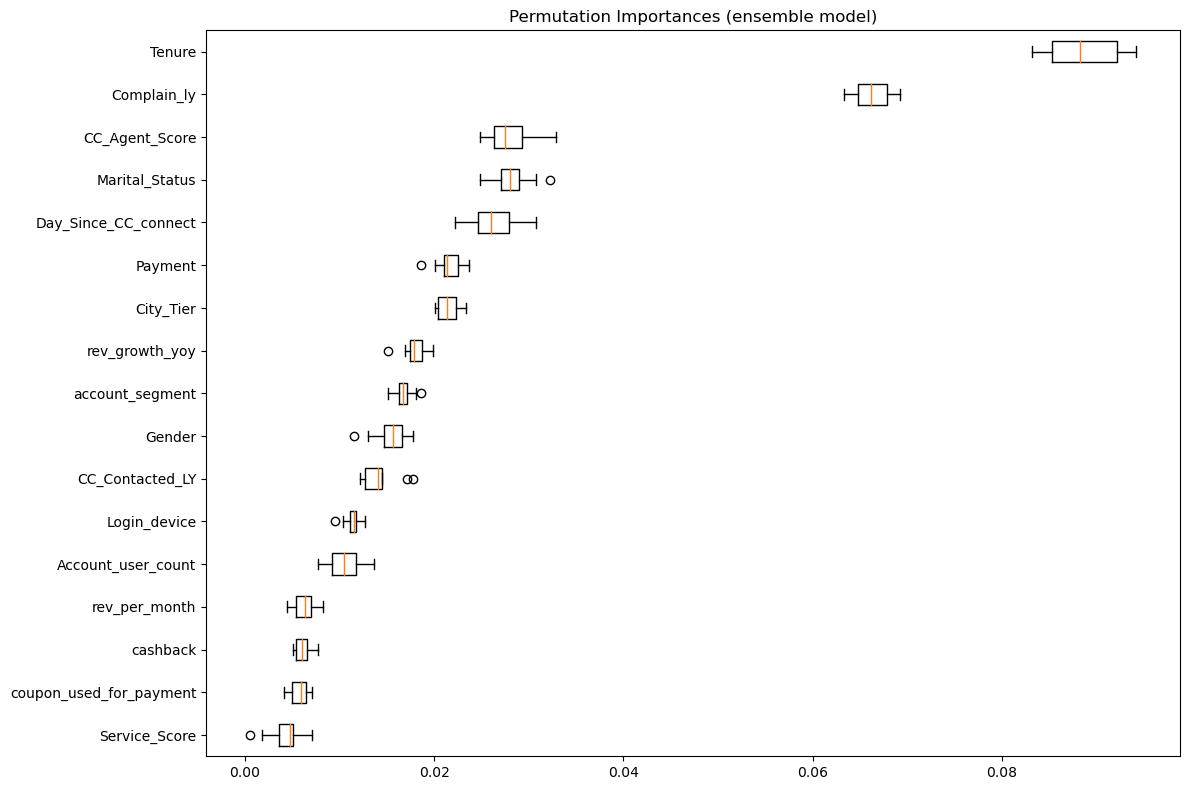

In [325]:
# Feature importance for individual models supporting feature_importances_
feature_importances = {}
for model_name, model in tuned_models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances[model_name] = model.feature_importances_

# Aggregate feature importances for plotting
features = X.columns
fig, ax = plt.subplots(figsize=(12, 8))
for model_name, importances in feature_importances.items():
    indices = np.argsort(importances)
    print("importances[indices]:",importances)
    print(len(indices), range(len(indices)))
    ax.barh(range(len(indices)), importances[indices], align='center', label=model_name)
    ax.set_yticks(range(len(indices)))
    ax.set_yticklabels(features[indices])
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importances by Model')
ax.legend()
plt.show()

# Permutation importance for the ensemble model
result = permutation_importance(ensemble_model1, X_Test, y_Test, n_repeats=10, random_state=42, n_jobs=-1)
print(result, result.importances_mean)
sorted_idx = result.importances_mean.argsort()


fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=features[sorted_idx])
ax.set_title("Permutation Importances (ensemble model)")
fig.tight_layout()
plt.show()